<a href="https://colab.research.google.com/github/tassiogomes/MINDD-ISEP/blob/main/Project_v6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

###### Installs

In [124]:
!pip install sweetviz


In [125]:
#Import Python Libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import sweetviz as sv
import IPython

#Data exploration

#### Data Dictionary

|Column name| Description|
|----|---|
|ID| unique ID of representative|
|Loan Amount| loan amount applied|
|Funded Amount|loan amount funded|
|Funded Amount Investor| loan amount approved by the investors|
|Term| term of loan (in months)|
|Batch Enrolled| batch numbers to representatives|
|Interest Rate| interest rate (%) on loan|
|Grade| grade by the bank|
|Sub Grade| sub-grade by the bank|
|Employment Duration| duration|
|Home Ownership| Owner ship of home|
|Verification Status| Income verification by the bank|
|Payment Plan| if any payment plan has started against loan|
|Loan Title| loan title provided|
|Debit to Income| ratio of representative's total monthly debt repayment divided by self reported monthly income excluding mortgage|
|Delinquency - two years| number of 30+ days delinquency in past 2 years|
|Inquires - six months| total number of inquiries in last 6 months|
|Open Account| number of open credit line in representative's credit line|
|Public Record| number of derogatory public records|
|Revolving Balance| total credit revolving balance|
|Revolving Utilities| amount of credit a representative is using relative to revolving_balance|
|Total Accounts| total number of credit lines available in representatives credit line|
|Initial List Status| unique listing status of the loan - W(Waiting), F(Forwarded)|
|Total Received Interest| total interest received till date|
|Total Received Late Fee| total late fee received till date|
|Recoveries| post charge off gross recovery|
|Collection Recovery Fee| post charge off collection fee|
|Collection 12 months Medical| total collections in last 12 months excluding medical collections|
|Application Type| indicates when the representative is an individual or joint|
|Last week Pay| indicates how long (in weeks) a representative has paid EMI after batch enrolled|
|Accounts Delinquent| number of accounts on which the representative is delinquent|
|Total Collection Amount| total collection amount ever owed|
|Total Current Balance| total current balance from all accounts|
|Total Revolving Credit Limit| total revolving credit limit|
|Loan Status| 1 = Defaulter, 0 = Non Defaulters|

#### Tabular exploration

In [126]:
#Cargar datos
drive.mount('/content/drive')
df = pd.read_csv('drive/My Drive/MINDD/train.csv')
#df = pd.read_csv("/content/drive/MyDrive/train.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [127]:
#drive.mount('/content/drive')
#df = pd.read_csv("/content/drive/MyDrive/train.csv")

In [128]:
df.columns

Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Employment Duration', 'Home Ownership', 'Verification Status',
       'Payment Plan', 'Loan Title', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

Vemos que no tiene valores nulos en ninguna de las columnas

In [130]:
df.drop_duplicates()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,16164945,13601,6848,13175.28583,59,BAT3193689,9.408858,C,A4,MORTGAGE,...,564.614852,0.865230,0,INDIVIDUAL,69,0,48,181775,34301,1
67459,35182714,8323,11046,15637.46301,59,BAT1780517,9.972104,C,B3,RENT,...,2.015494,1.403368,0,INDIVIDUAL,14,0,37,22692,8714,0
67460,16435904,15897,32921,12329.45775,59,BAT1761981,19.650943,A,F3,MORTGAGE,...,5.673092,1.607093,0,INDIVIDUAL,137,0,17,176857,42330,0
67461,5300325,16567,4975,21353.68465,59,BAT2333412,13.169095,D,E3,OWN,...,1.157454,0.207608,0,INDIVIDUAL,73,0,61,361339,39075,0


El dataset no contenia duplicados.

In [131]:
# Tassio
#check null values
df.isnull().sum(axis = 0)

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay 

No null values

In [132]:
# check if all ids are unique
len(df['ID'].unique()) == len(df.index)

True

In [133]:
def unique_value_for_dataframe(df):
  for cols in df.columns:
    print('----------Unique values in "'+ cols +'" column-------------------')
    print(df[cols].unique())
    print('-----------End of unique values for "' + cols +'" columns ---------------\n' )

unique_value_for_dataframe(df)

----------Unique values in "ID" column-------------------
[65087372  1450153  1969101 ... 16435904  5300325 65443173]
-----------End of unique values for "ID" columns ---------------

----------Unique values in "Loan Amount" column-------------------
[10000  3609 28276 ... 30703 17417  8323]
-----------End of unique values for "Loan Amount" columns ---------------

----------Unique values in "Funded Amount" column-------------------
[32236 11940  9311 ... 17672 32921 29875]
-----------End of unique values for "Funded Amount" columns ---------------

----------Unique values in "Funded Amount Investor" column-------------------
[12329.36286 12191.99692 21603.22455 ... 12329.45775 21353.68465
 14207.4486 ]
-----------End of unique values for "Funded Amount Investor" columns ---------------

----------Unique values in "Term" column-------------------
[59 36 58]
-----------End of unique values for "Term" columns ---------------

----------Unique values in "Batch Enrolled" column------------

In [134]:
# shape
print(df.shape)
# describe
print(df.describe())

(67463, 35)
                 ID   Loan Amount  Funded Amount  Funded Amount Investor  \
count  6.746300e+04  67463.000000   67463.000000            67463.000000   
mean   2.562761e+07  16848.902776   15770.599114            14621.799323   
std    2.109155e+07   8367.865726    8150.992662             6785.345170   
min    1.297933e+06   1014.000000    1014.000000             1114.590204   
25%    6.570288e+06  10012.000000    9266.500000             9831.684984   
50%    1.791565e+07  16073.000000   13042.000000            12793.682170   
75%    4.271521e+07  22106.000000   21793.000000            17807.594120   
max    7.224578e+07  35000.000000   34999.000000            34999.746430   

               Term  Interest Rate  Home Ownership  Debit to Income  \
count  67463.000000   67463.000000    67463.000000     67463.000000   
mean      58.173814      11.846258    80541.502522        23.299241   
std        3.327441       3.718629    45029.120366         8.451824   
min       36.000000

#### Autoreport

In [ ]:
analyze_report = sv.analyze(df)
analyze_report.show_html('analyze.html', open_browser=False)

                                             |          | [  0%]   00:00 -> (? left)

Report analyze.html was generated.



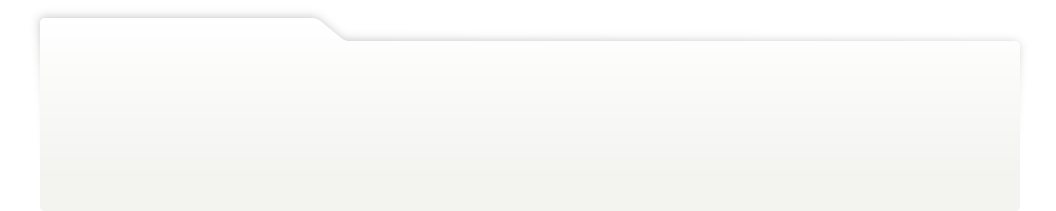
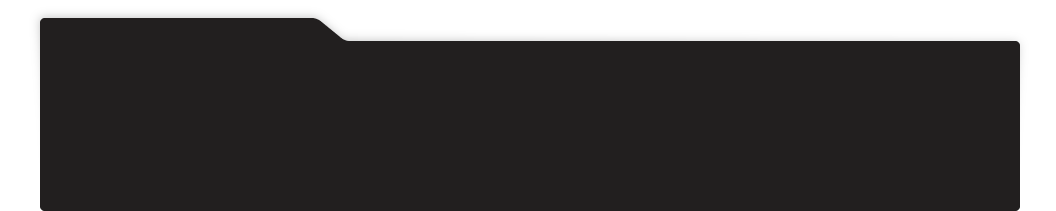
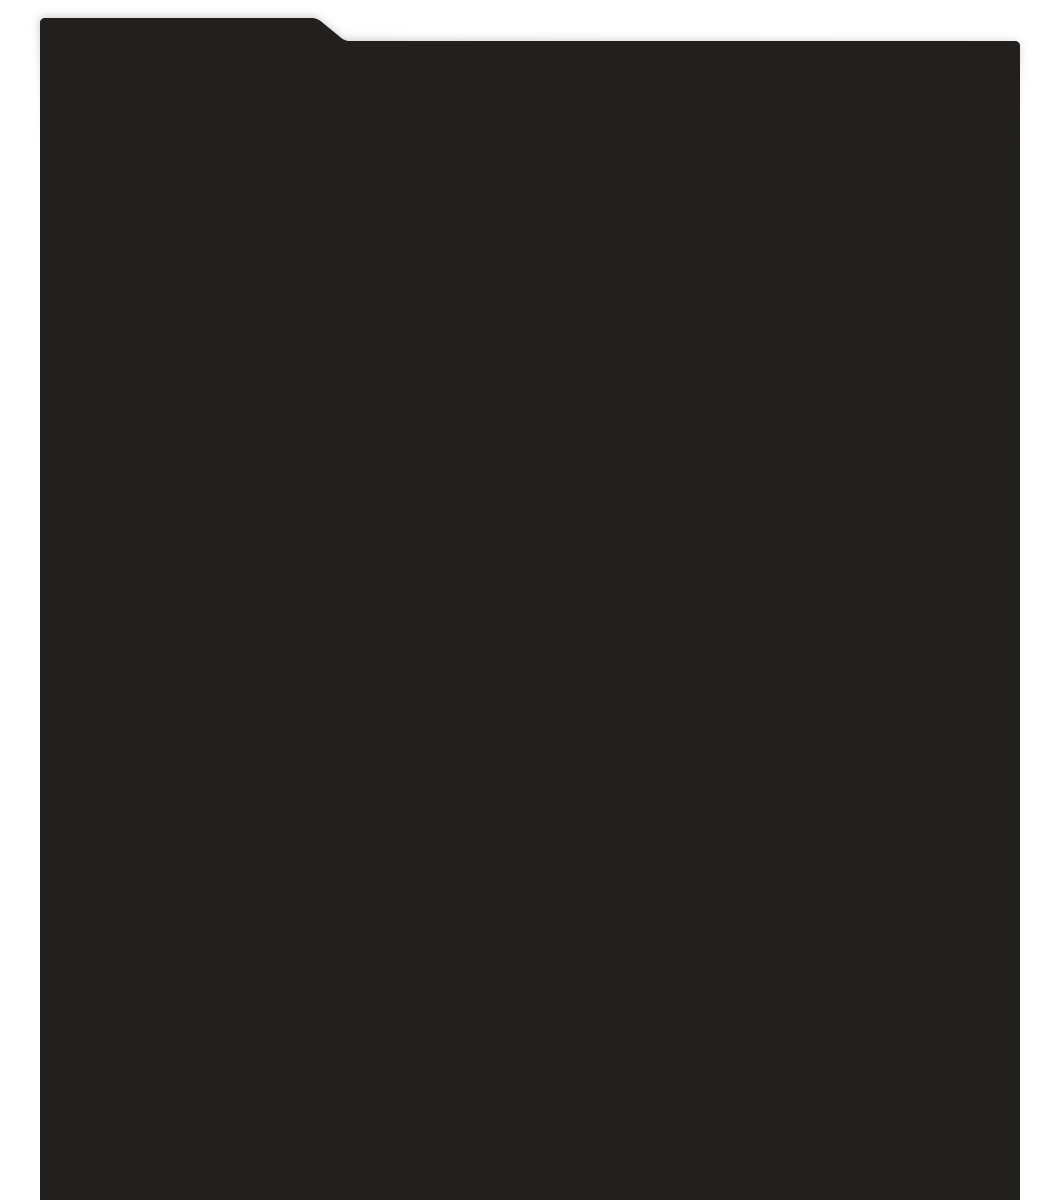
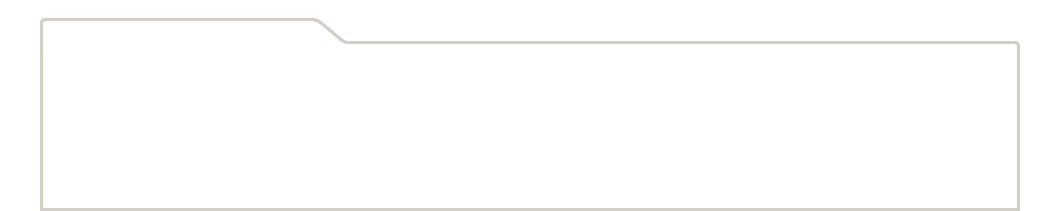
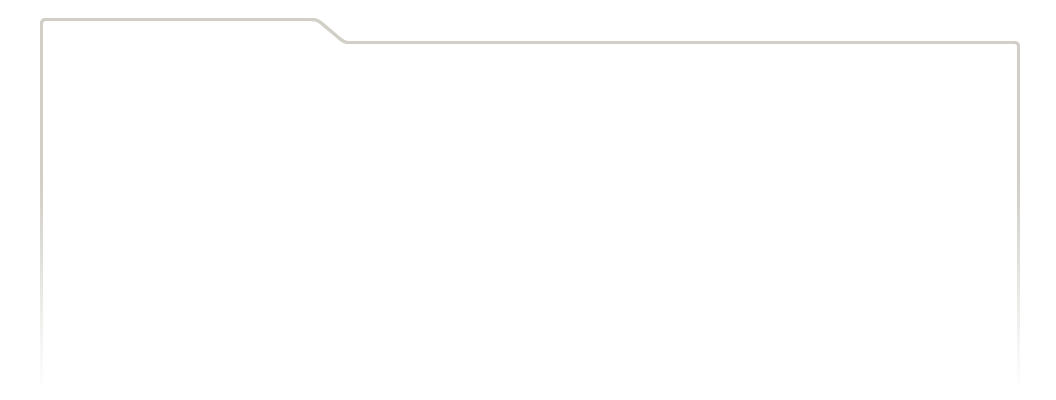
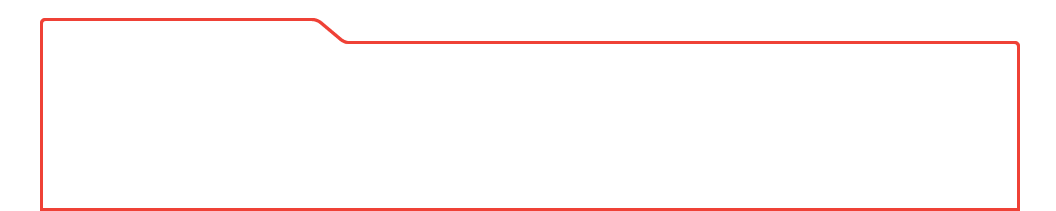
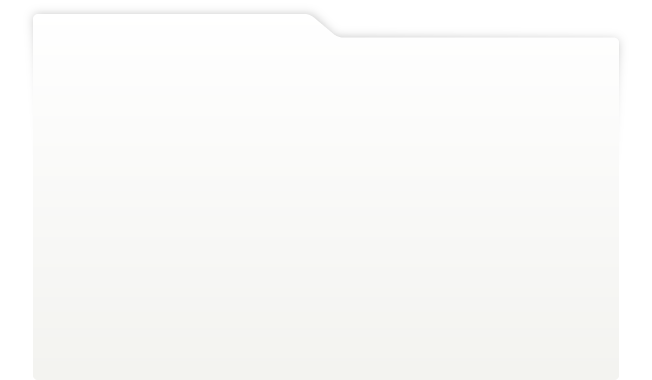
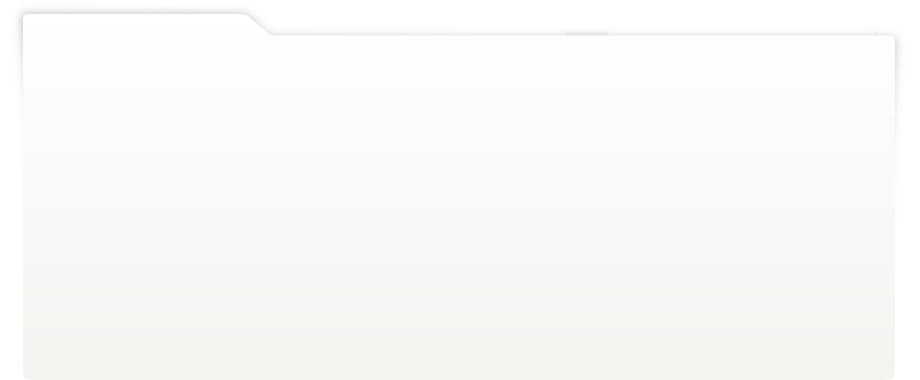
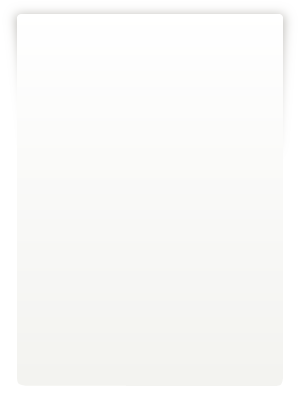
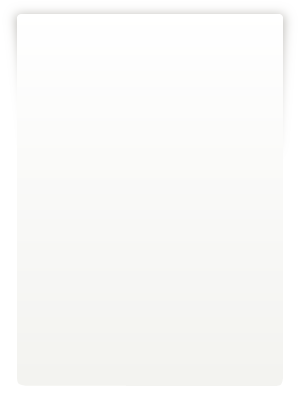
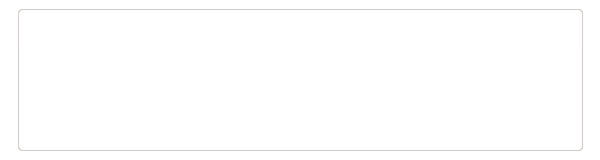
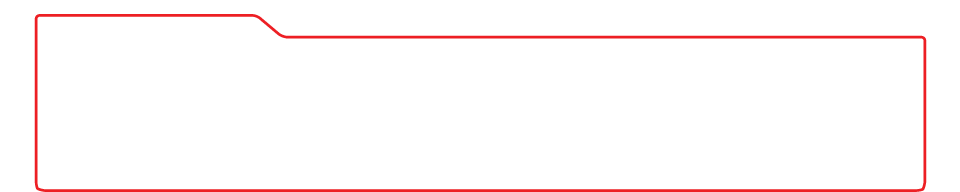
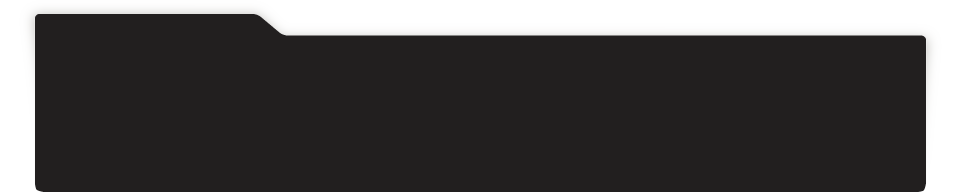
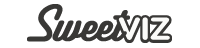
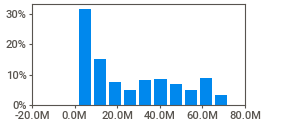
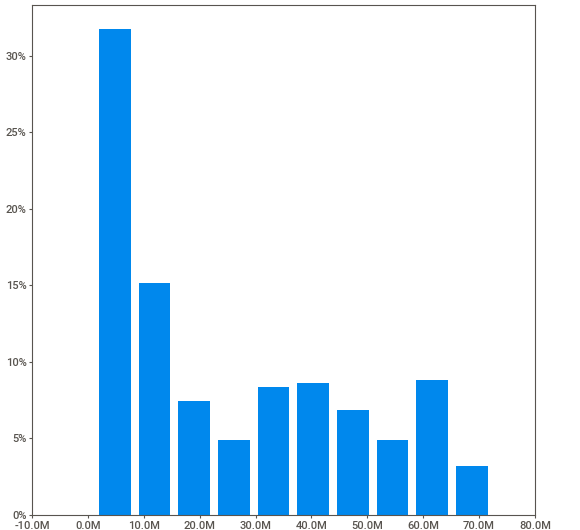
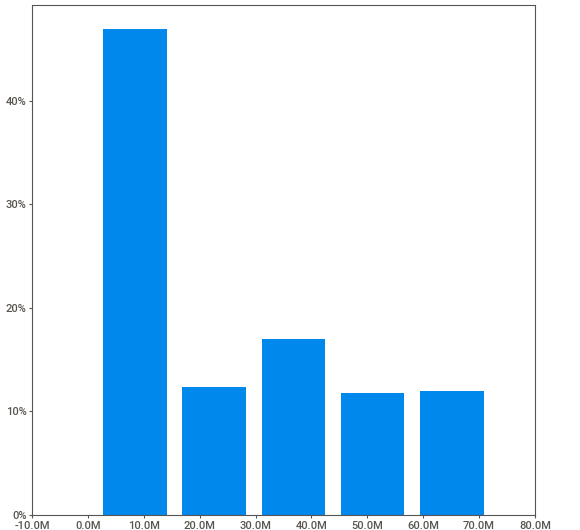
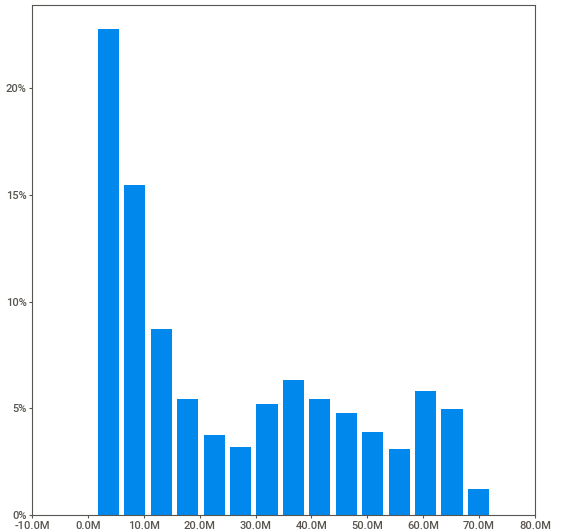
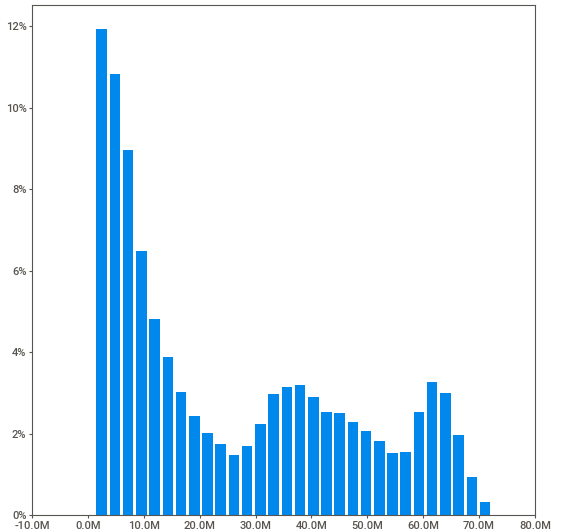
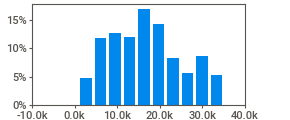
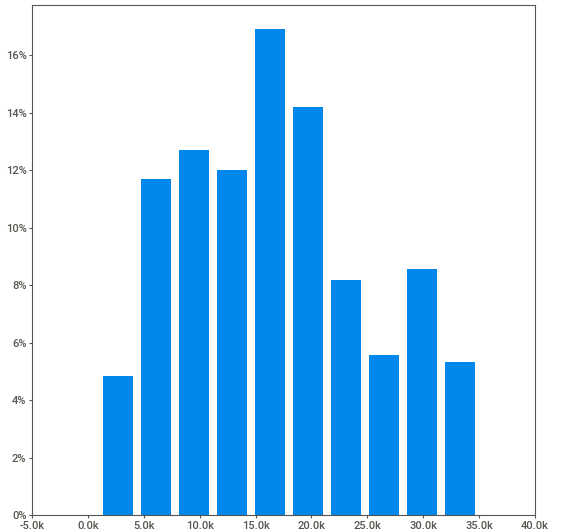
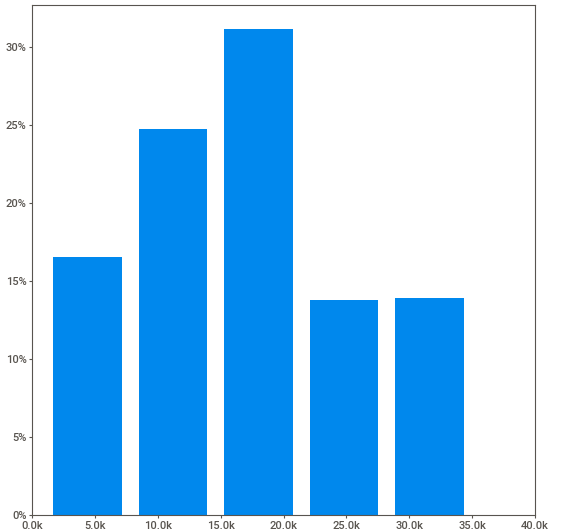
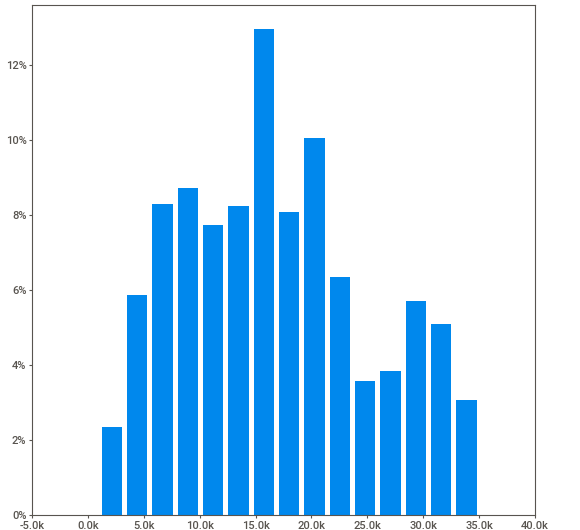
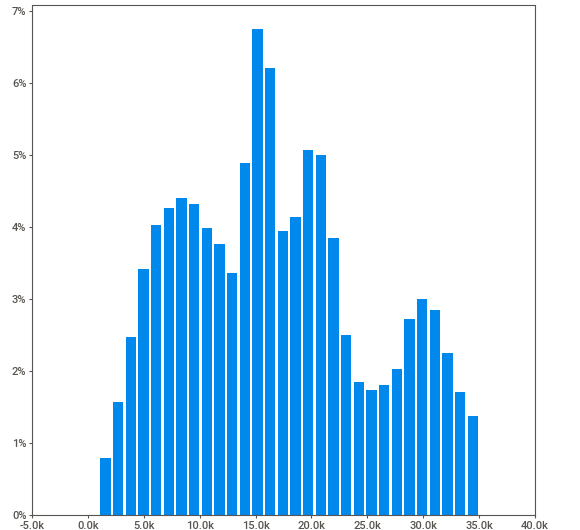
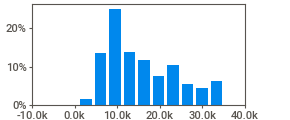
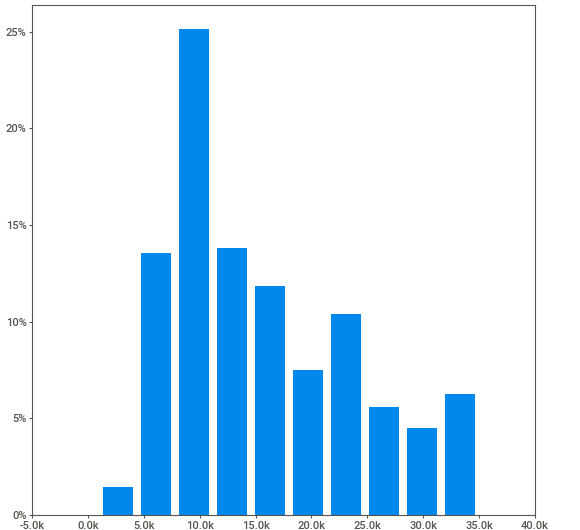
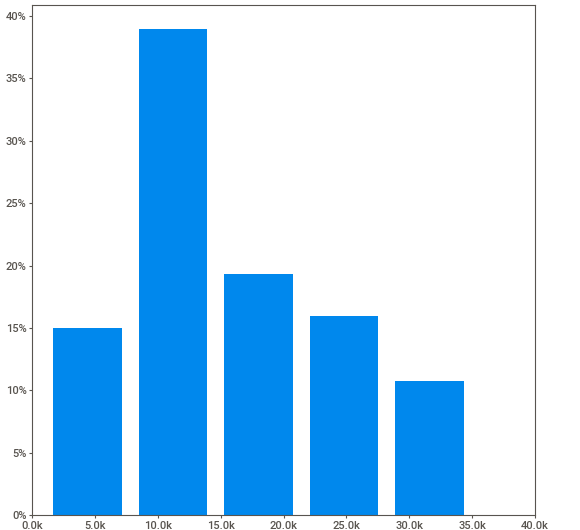
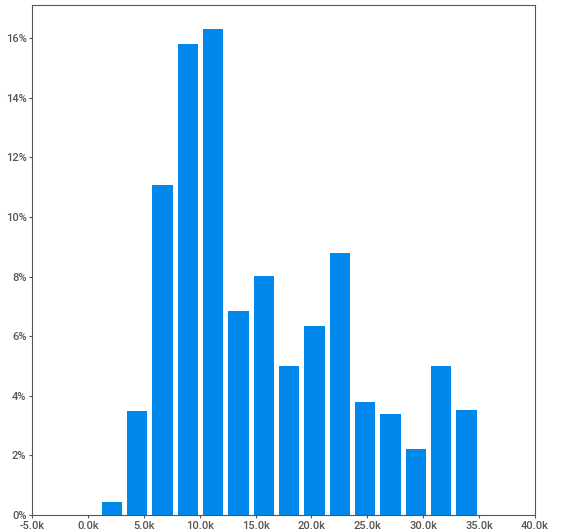
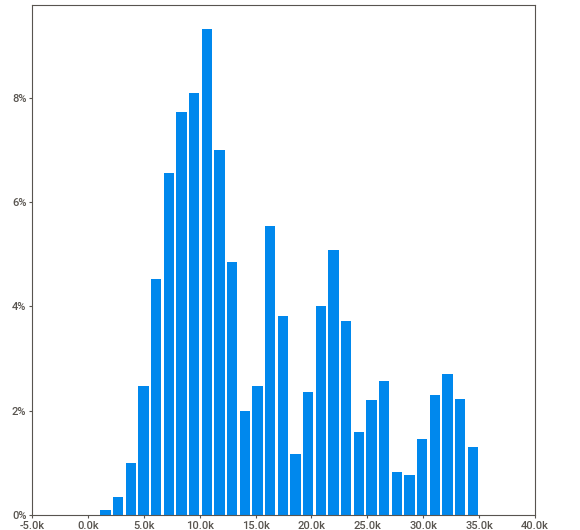
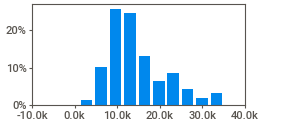
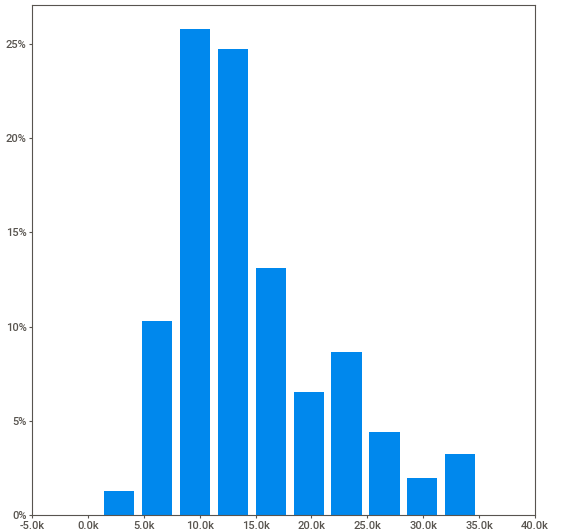
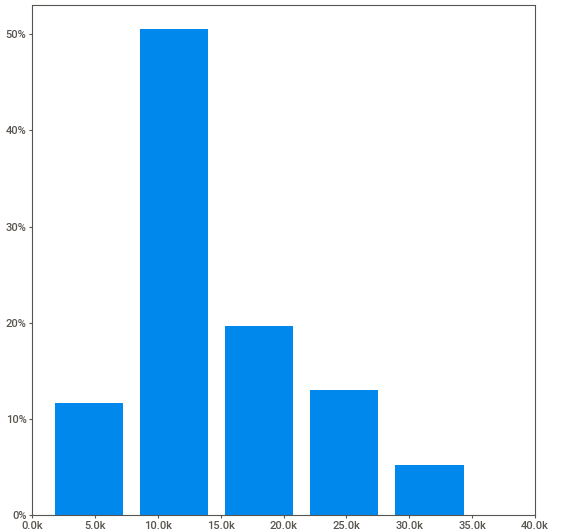
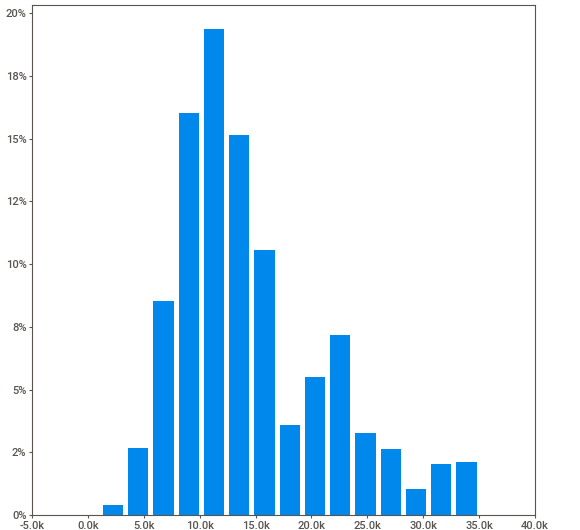
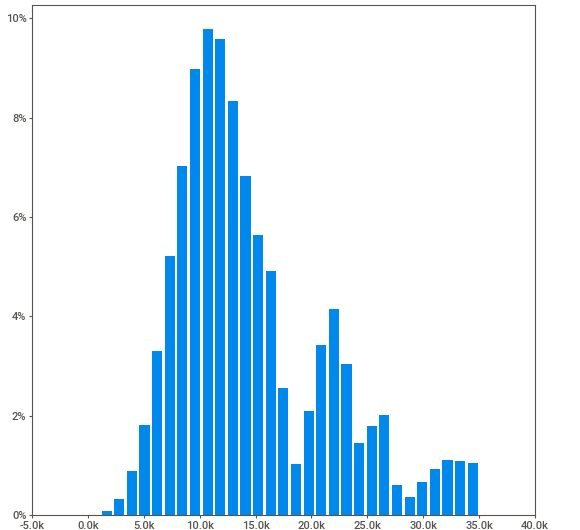
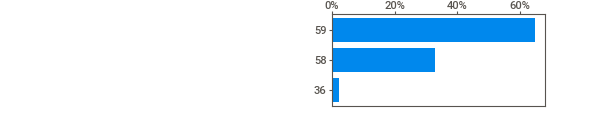
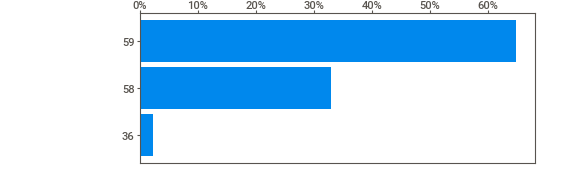
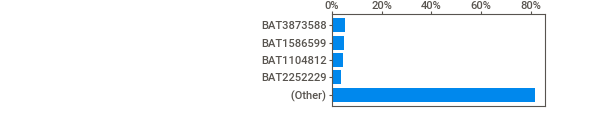
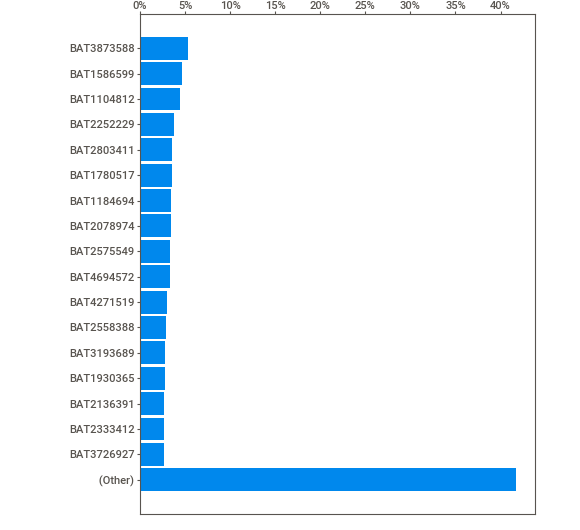
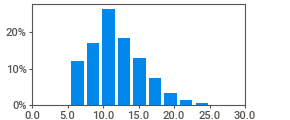
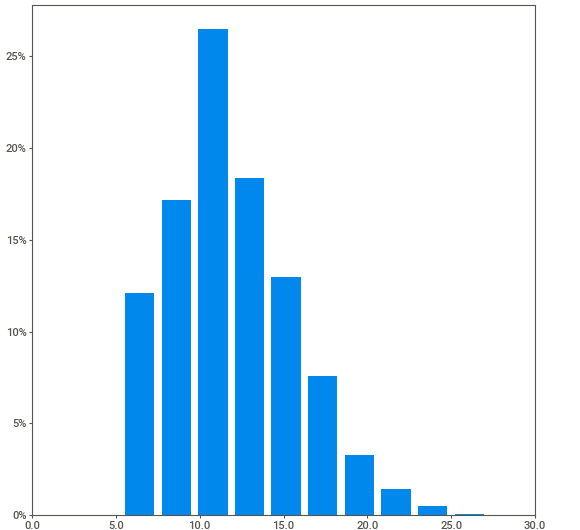
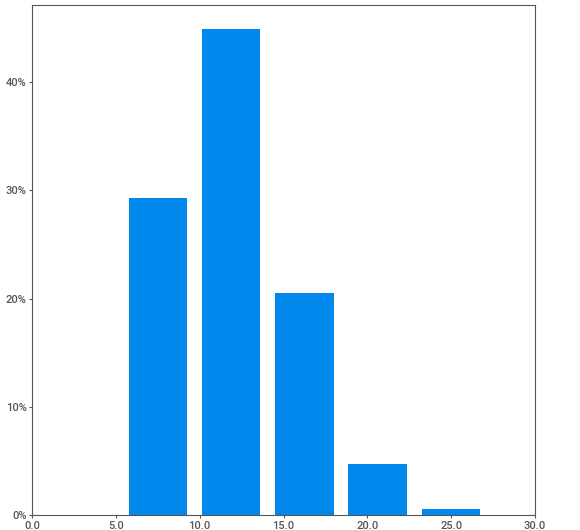
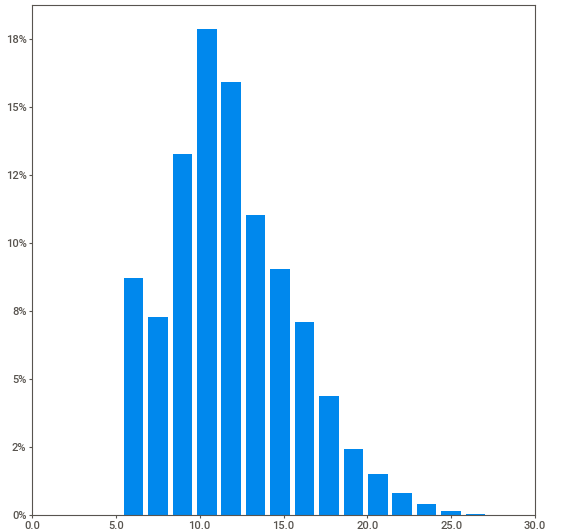
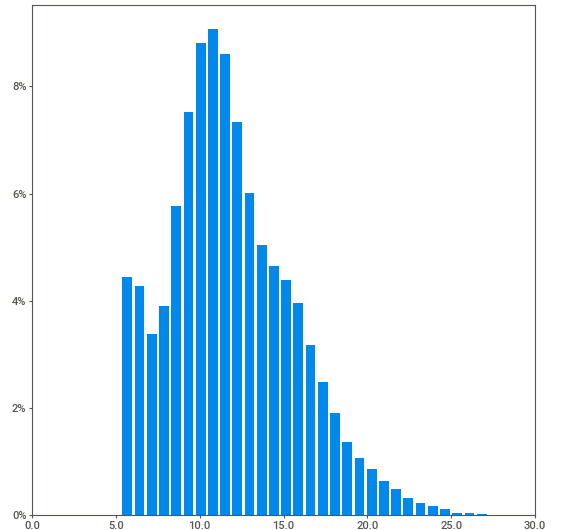
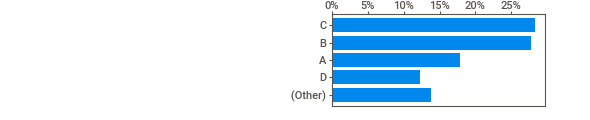
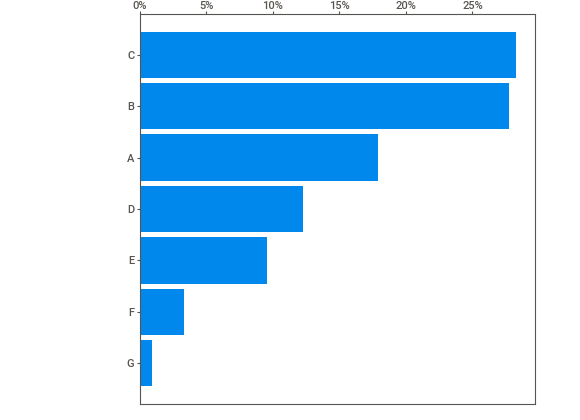
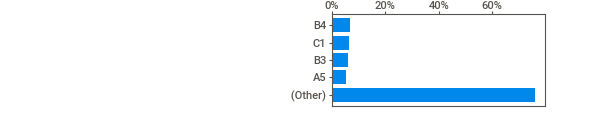
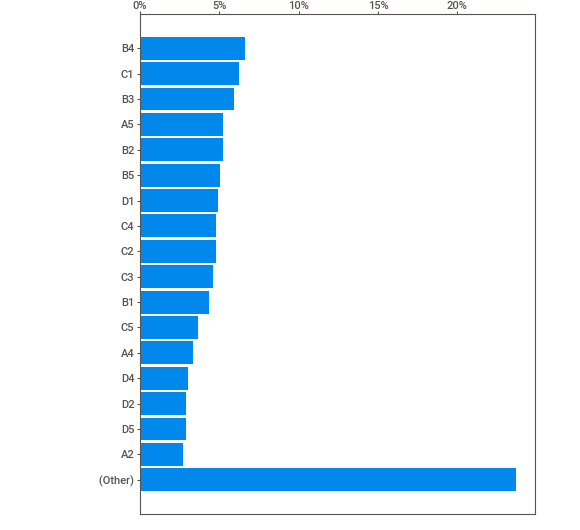
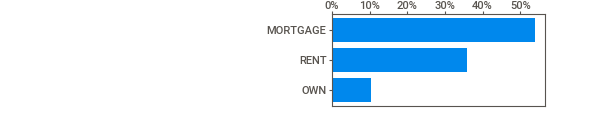
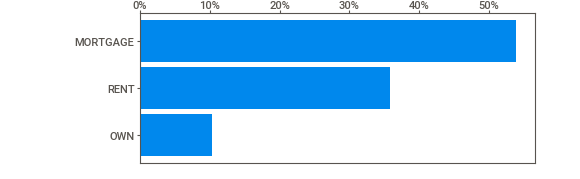
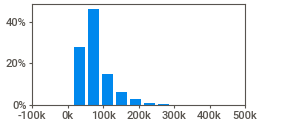
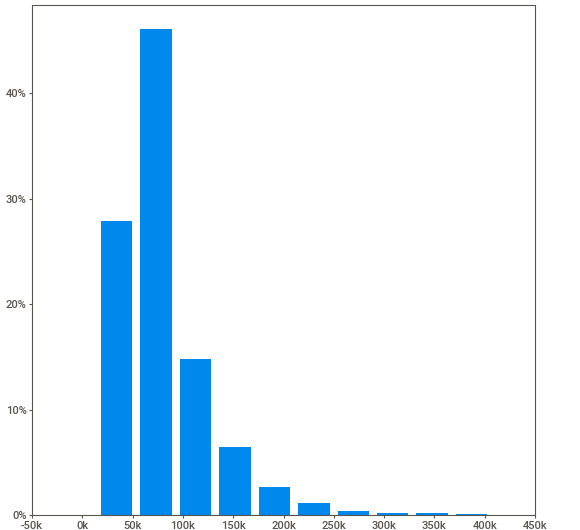
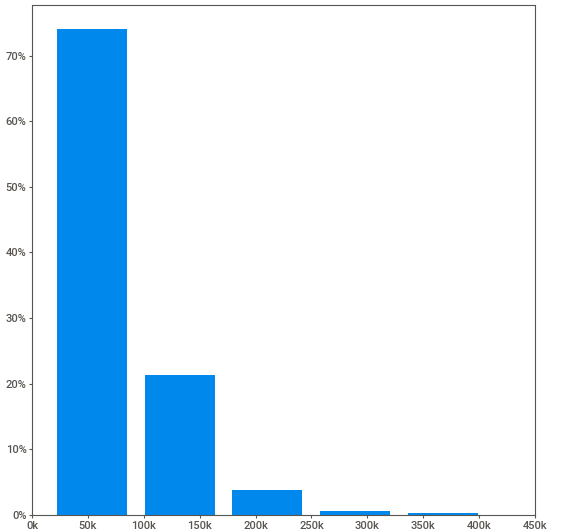
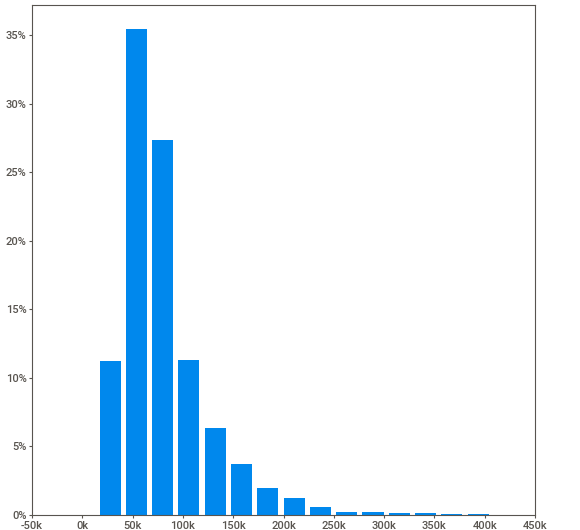
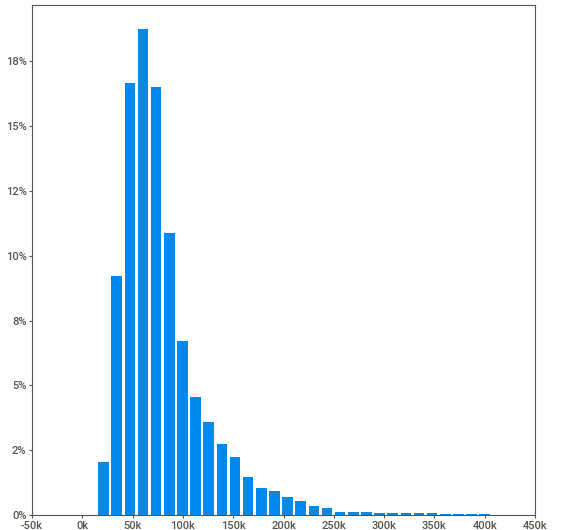
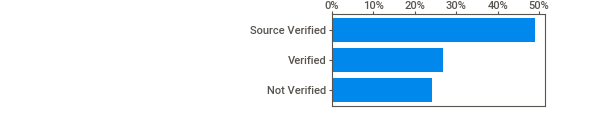
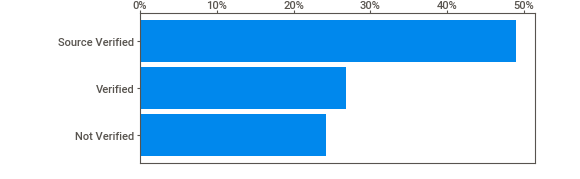
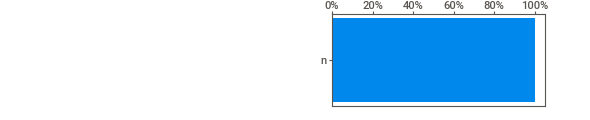
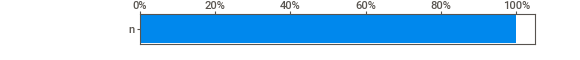
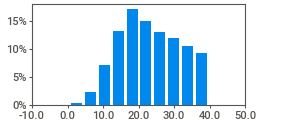
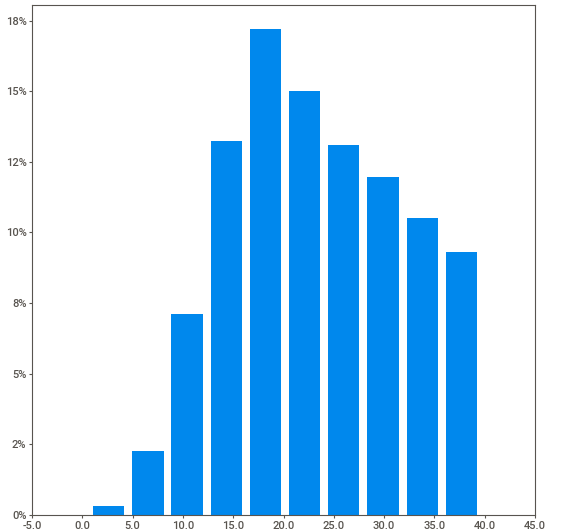
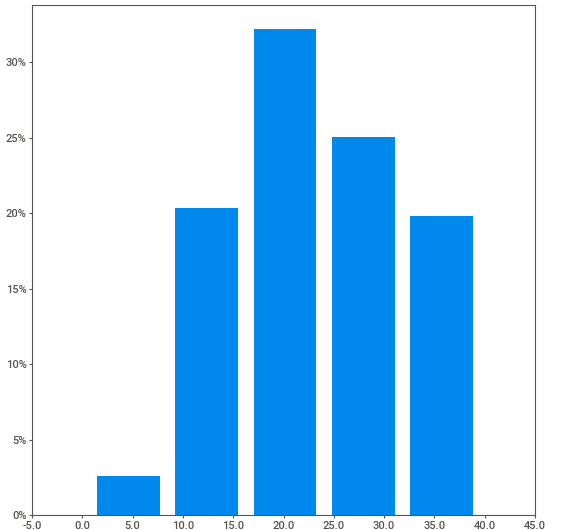
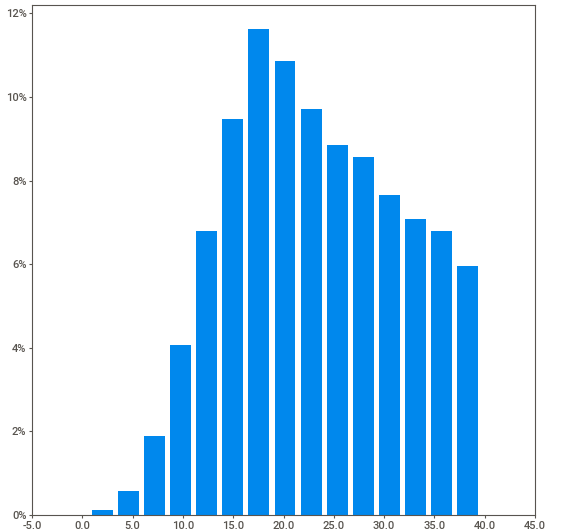
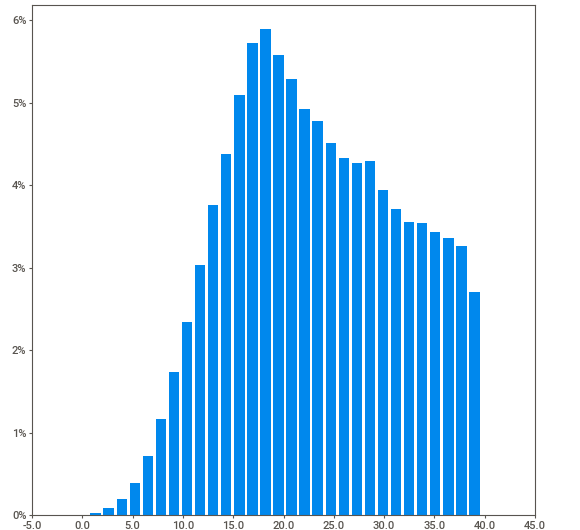
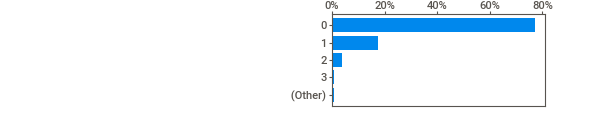
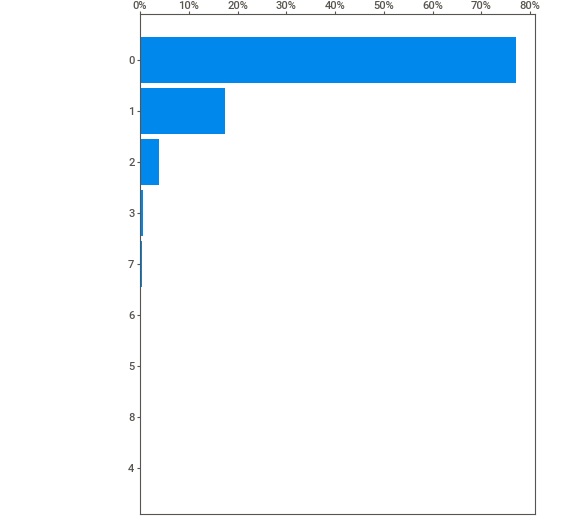
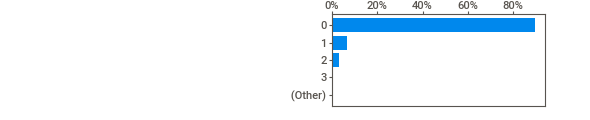
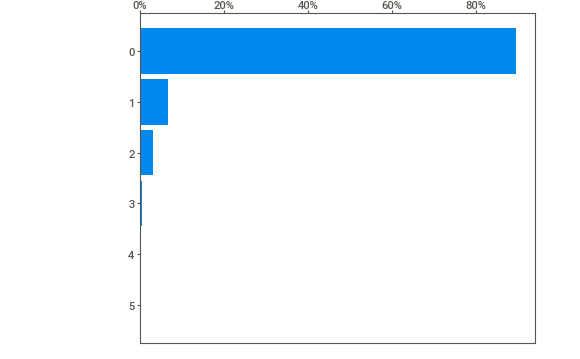
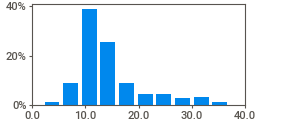
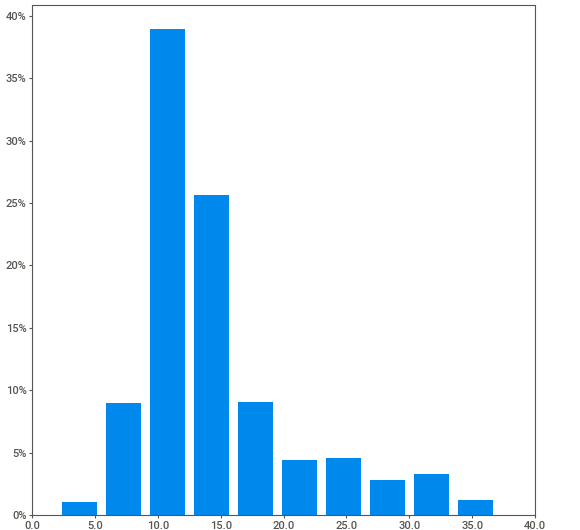
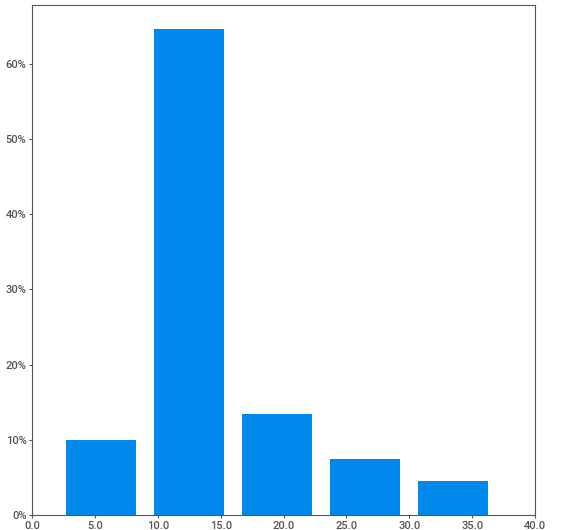
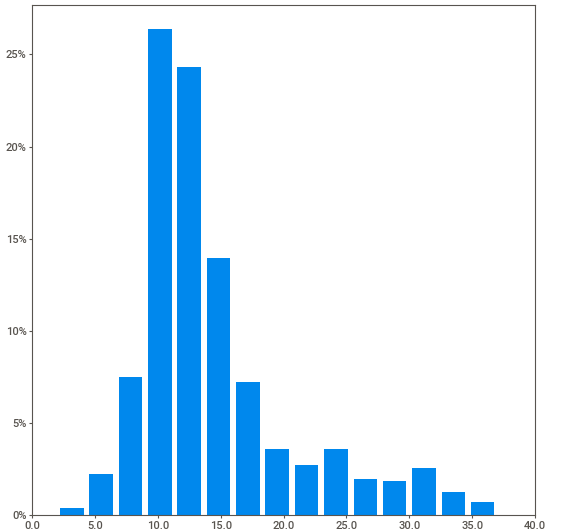
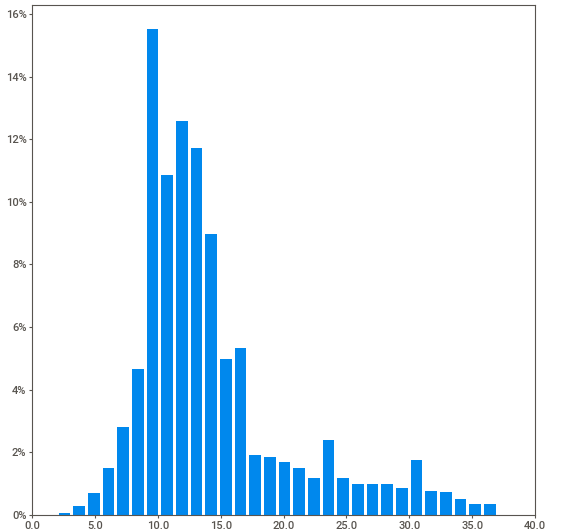
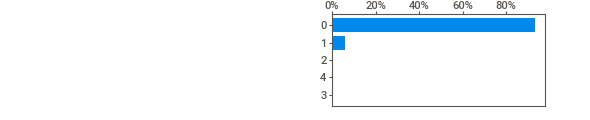
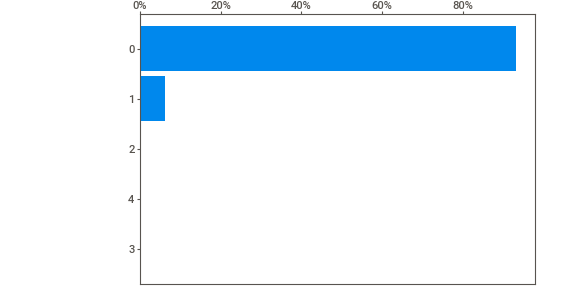
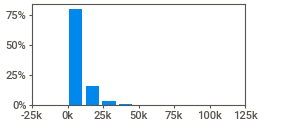
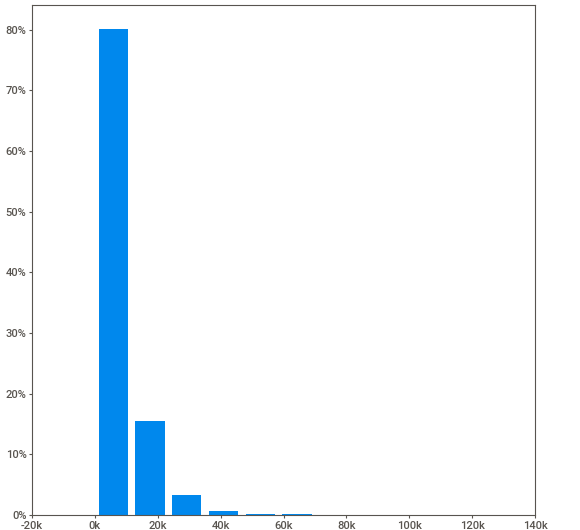
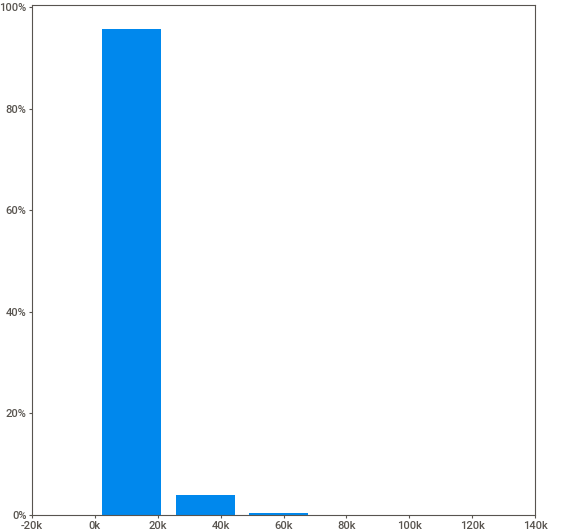
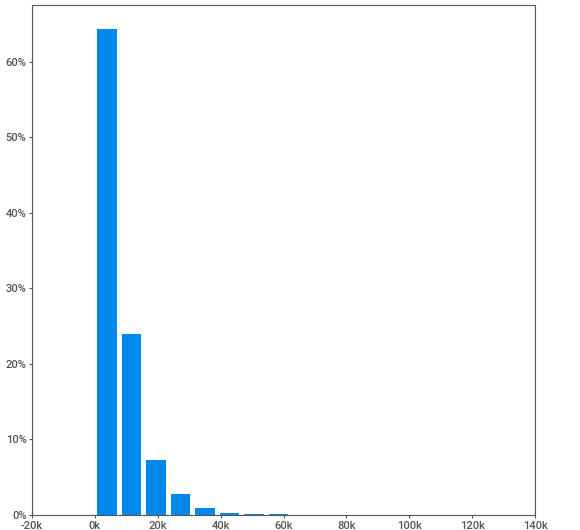
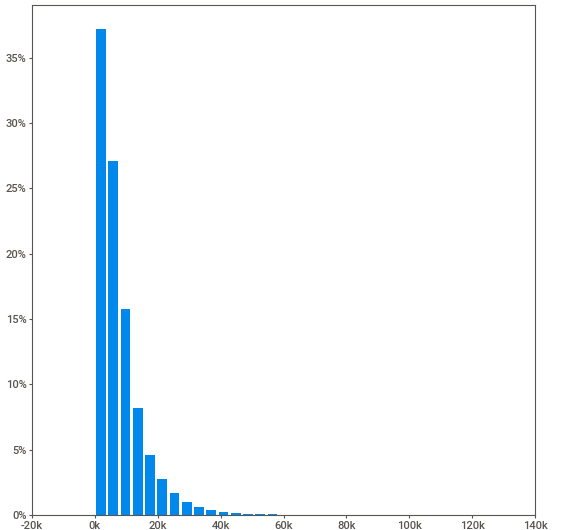
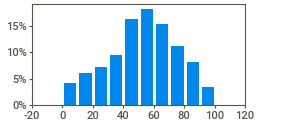
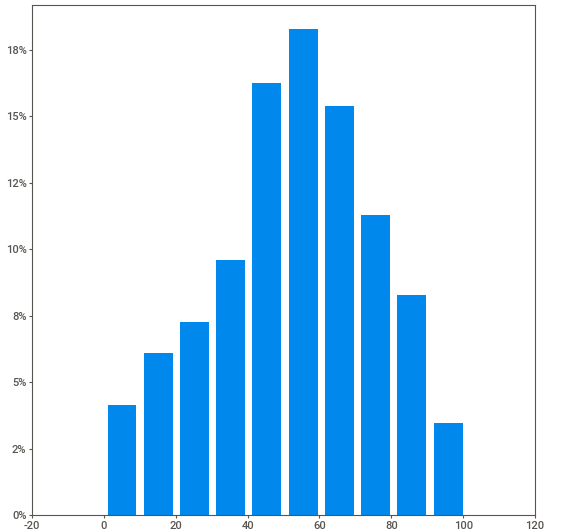
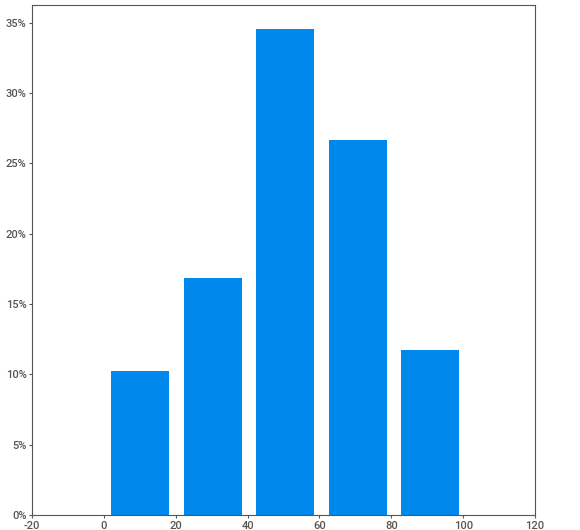
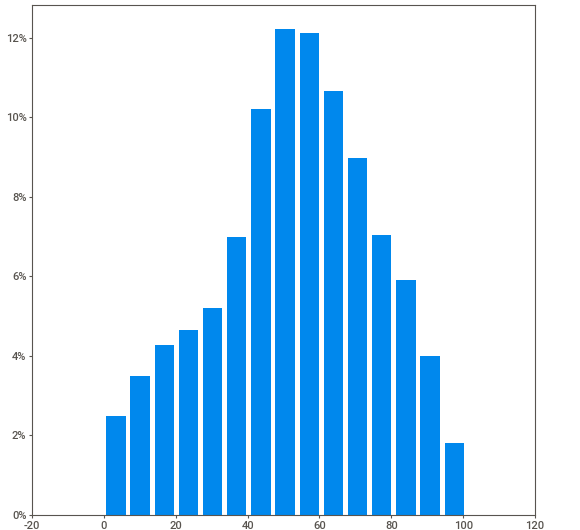
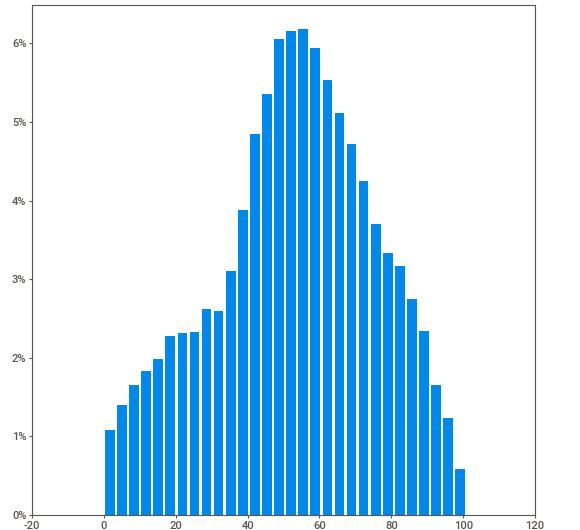
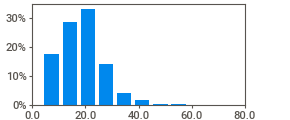
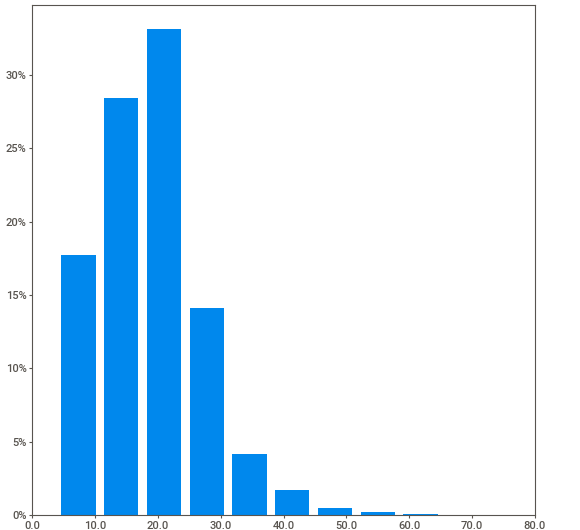
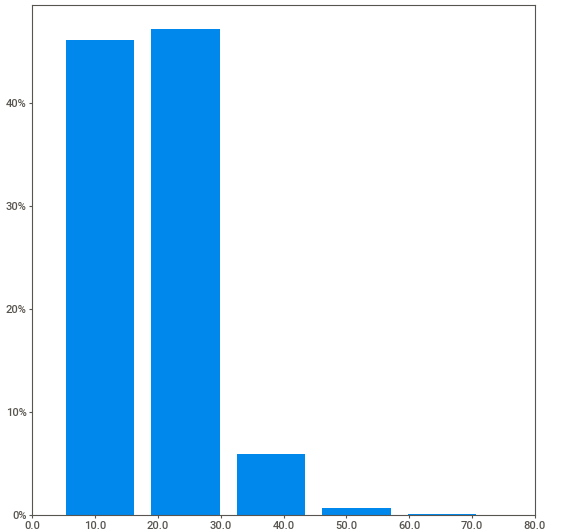
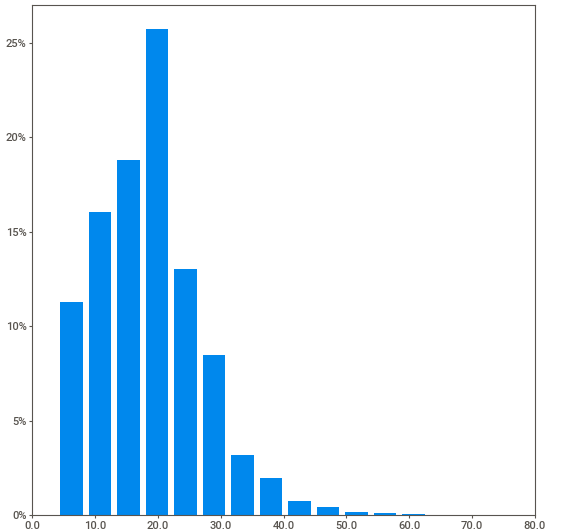
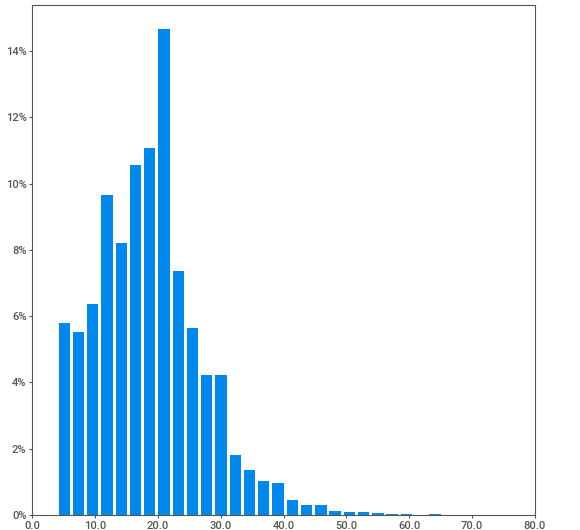
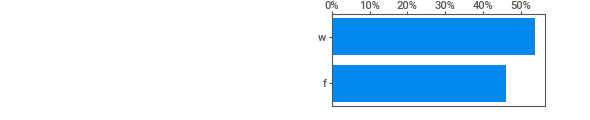
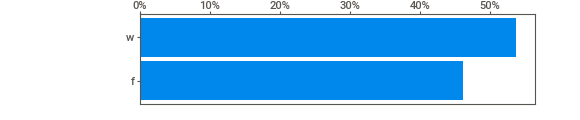
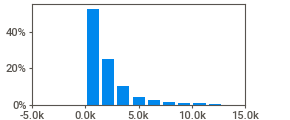
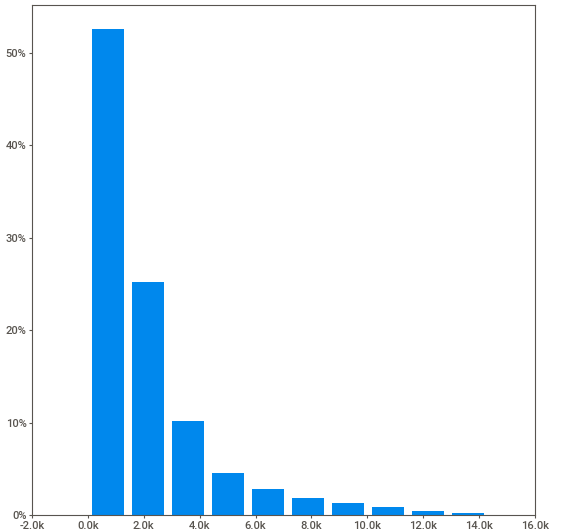
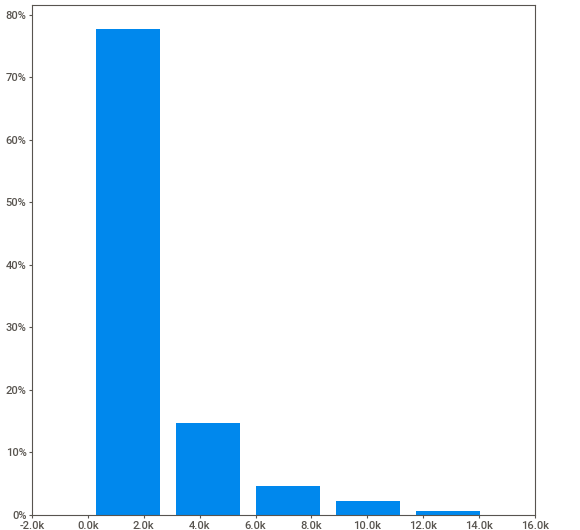
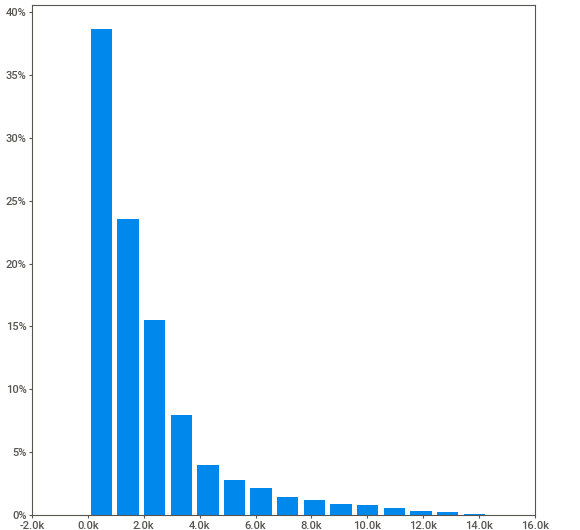
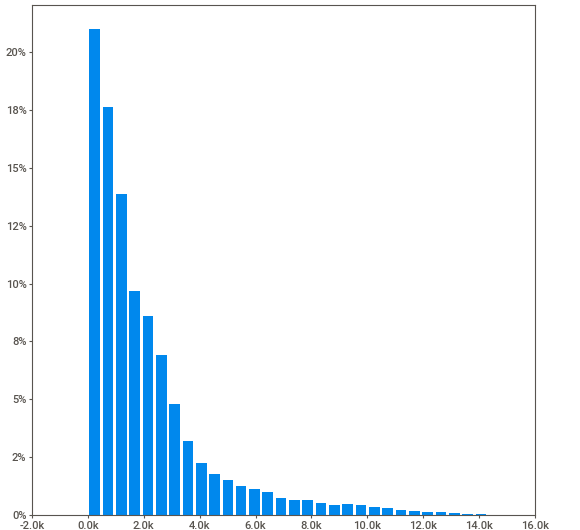
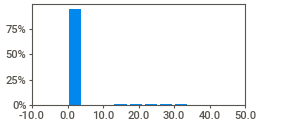
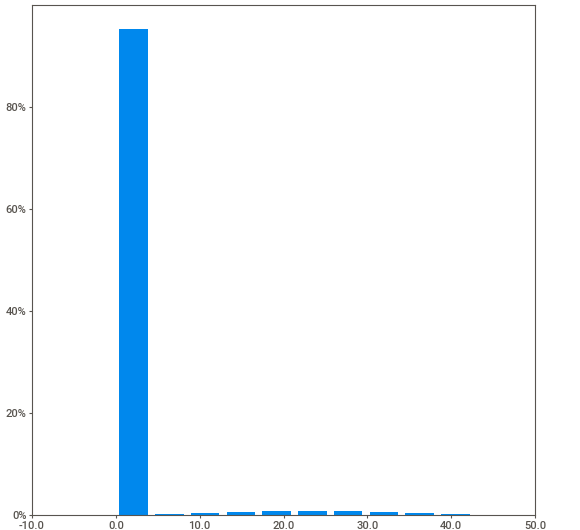
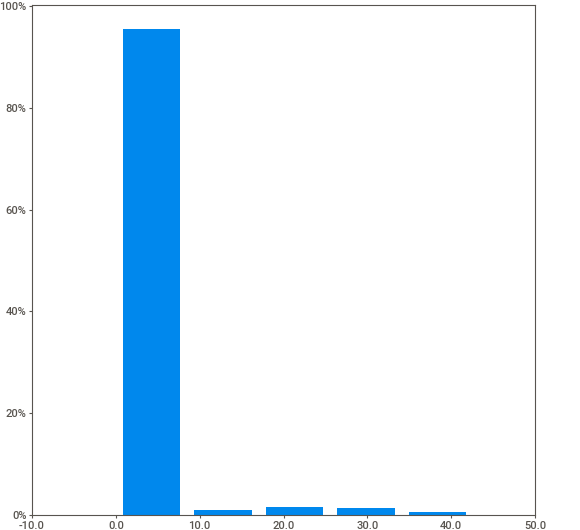
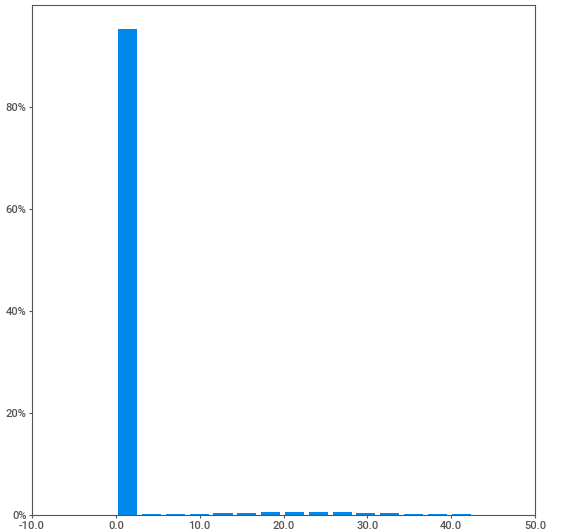
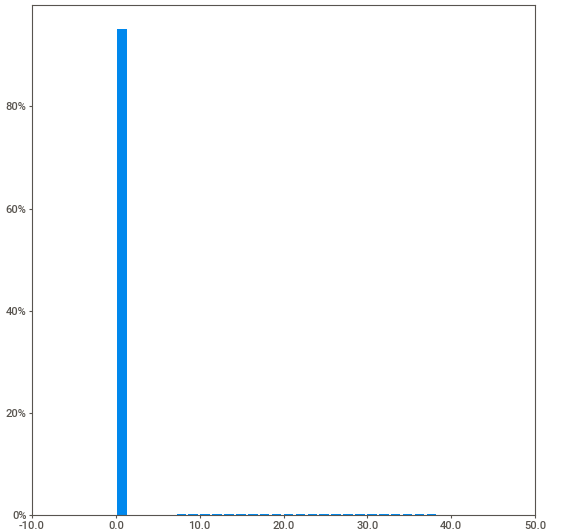
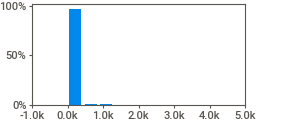
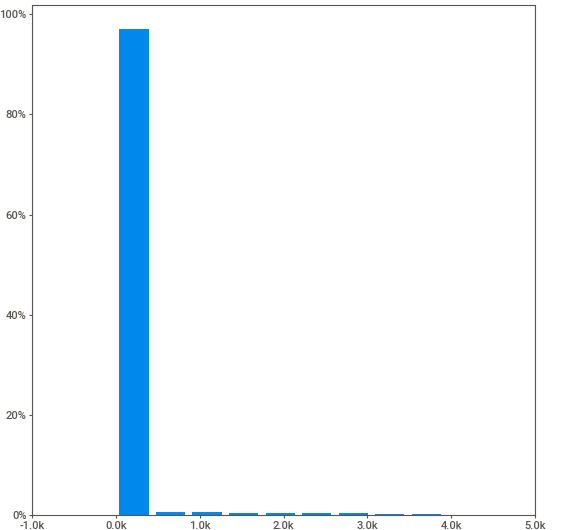
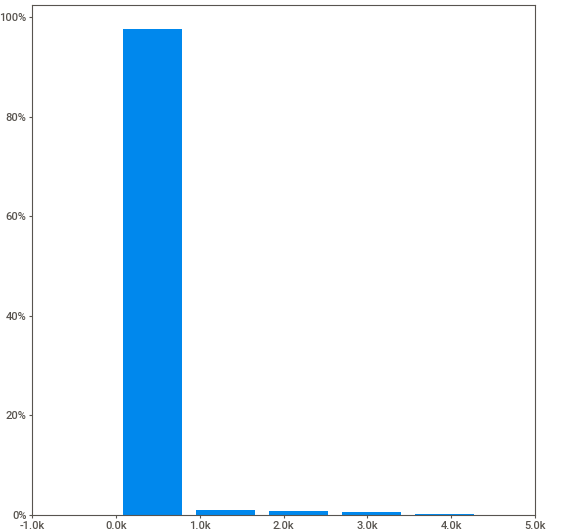
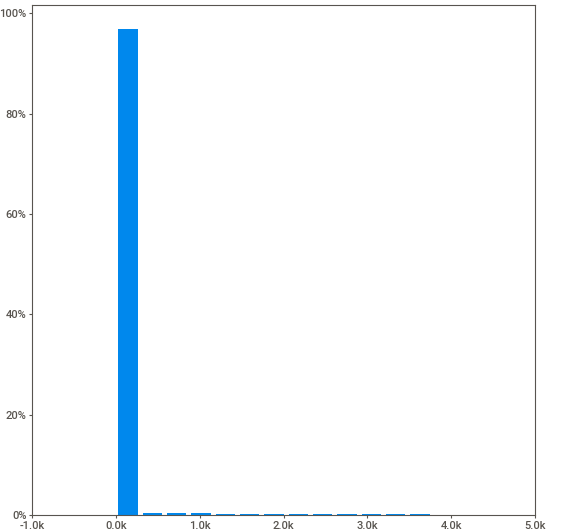
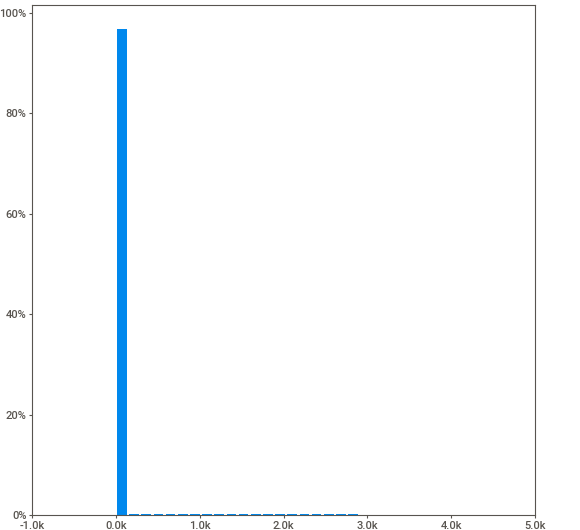
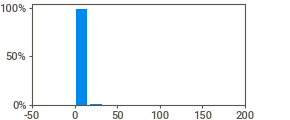
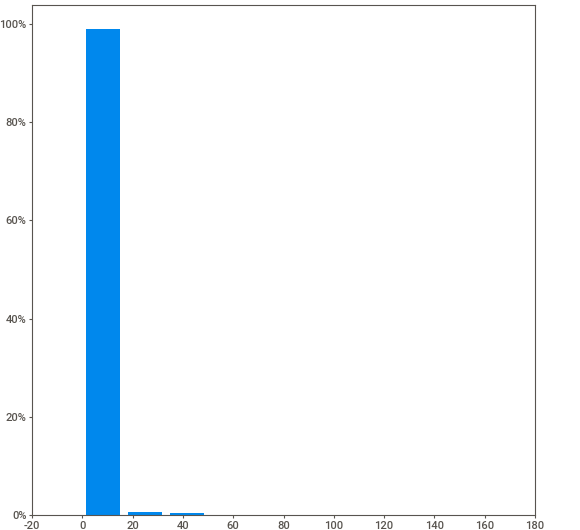
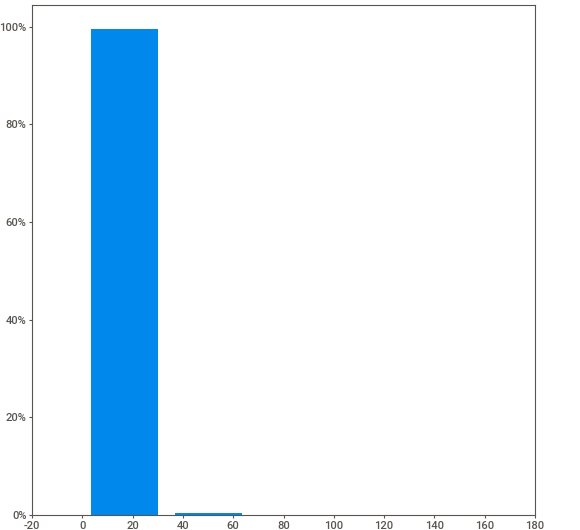
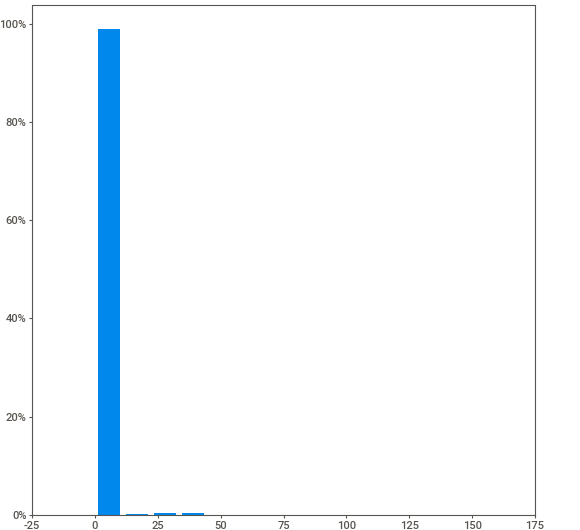
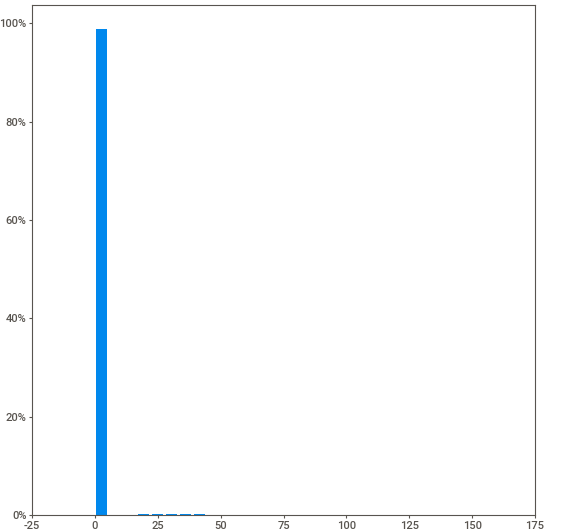
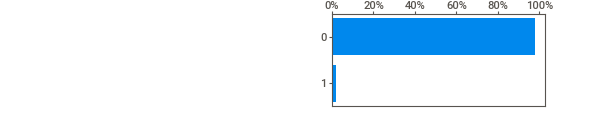
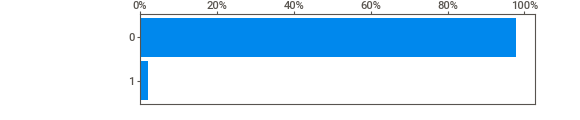
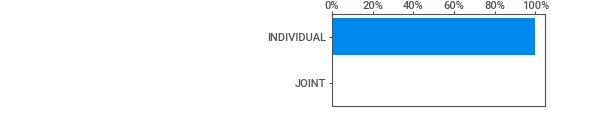
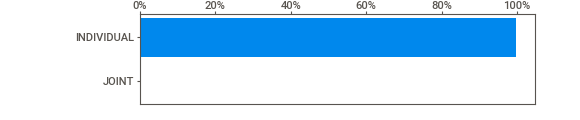
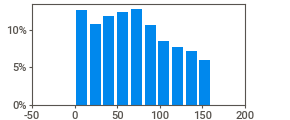
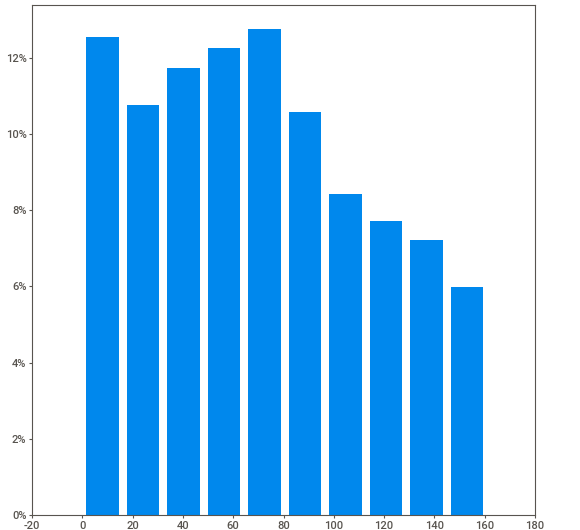
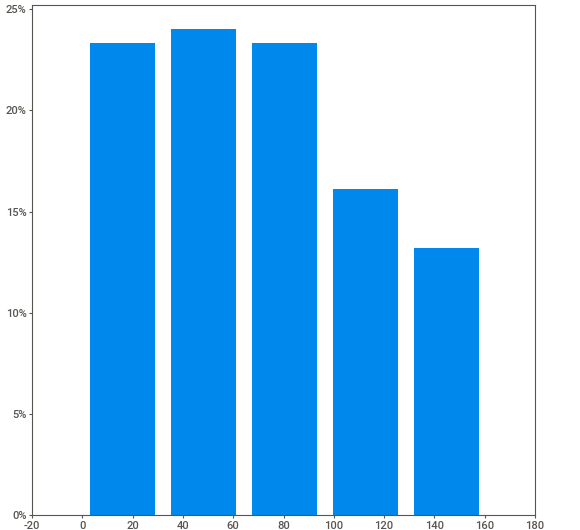
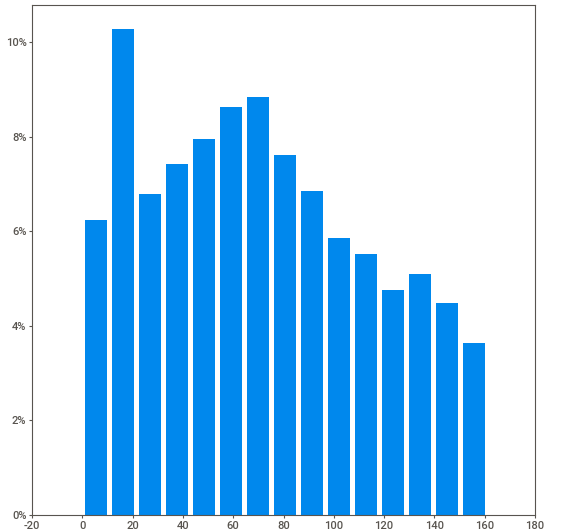
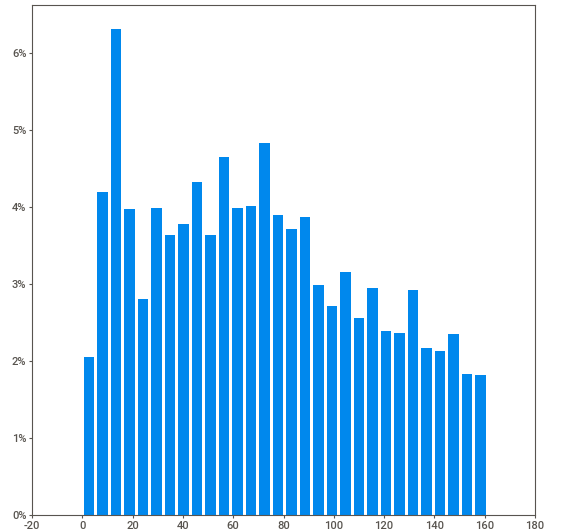
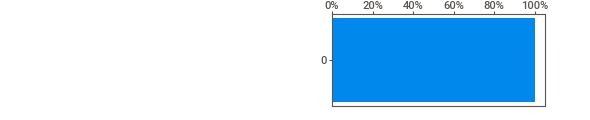
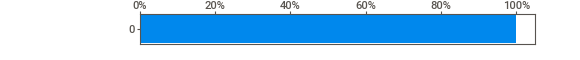
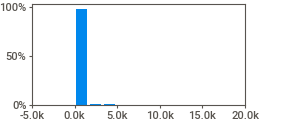
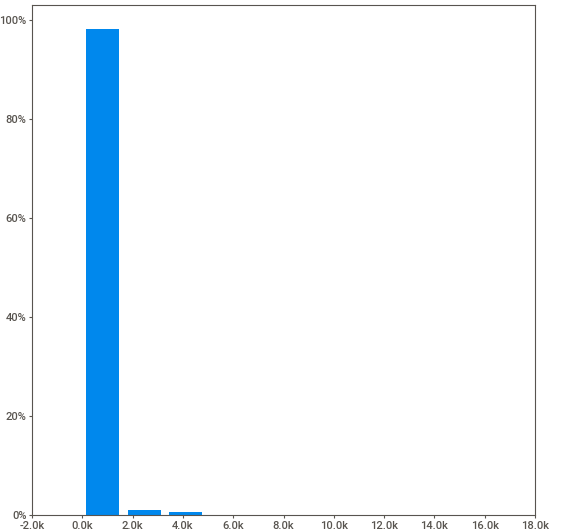
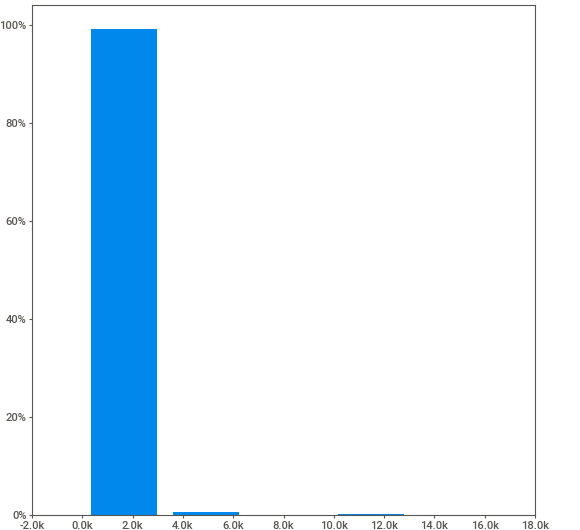
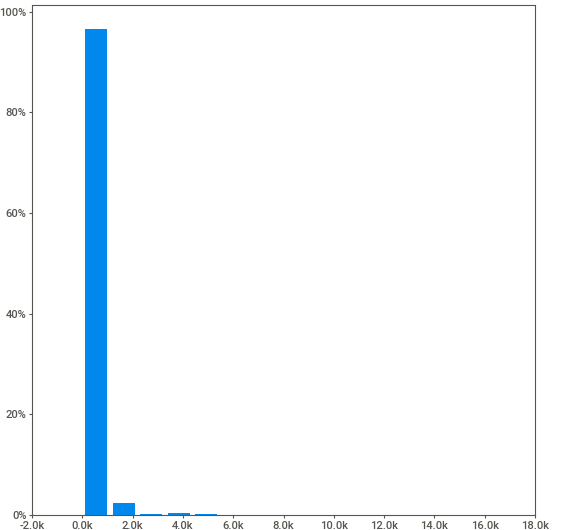
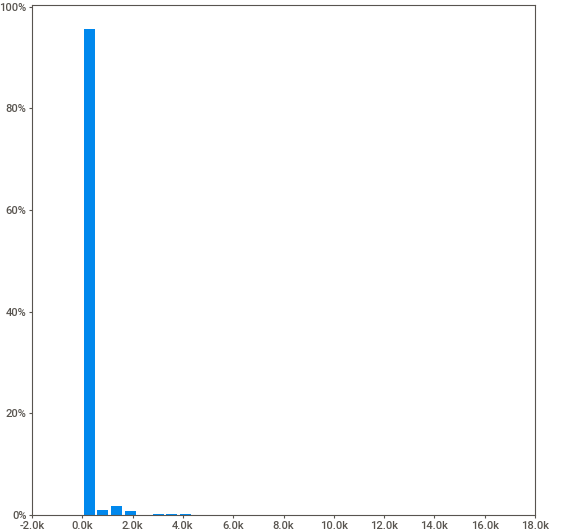
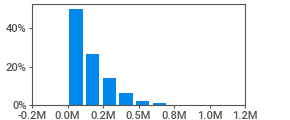
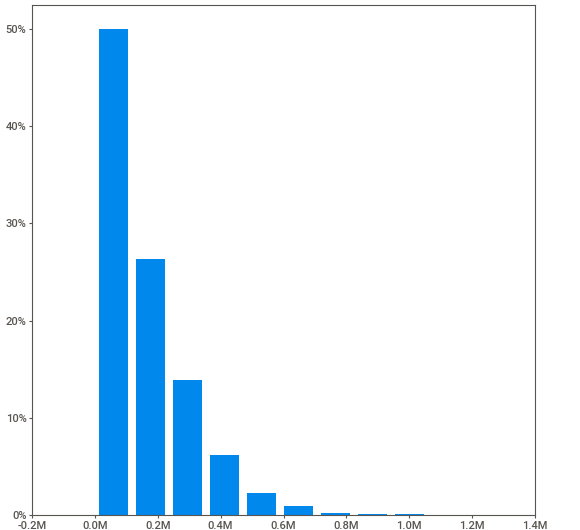
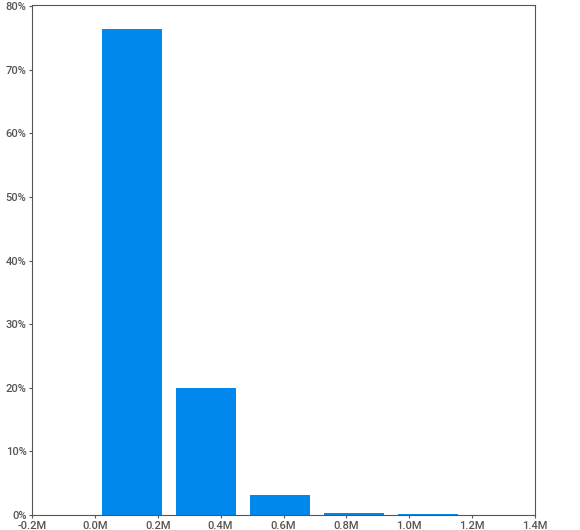
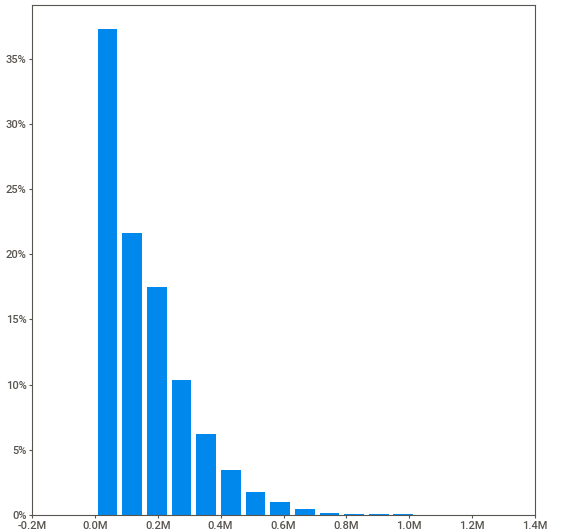
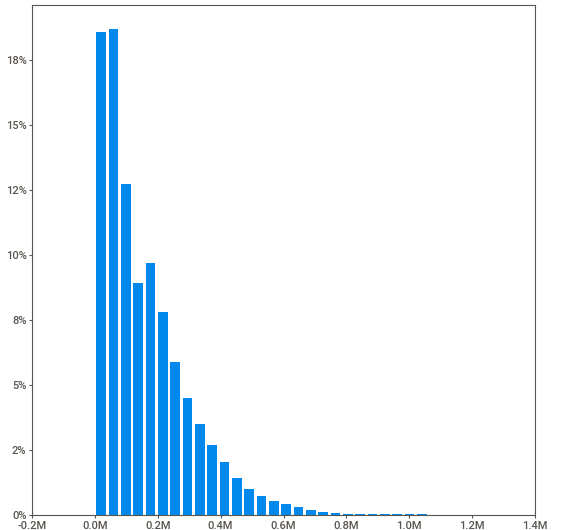
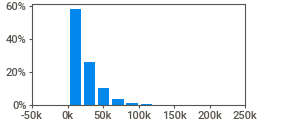
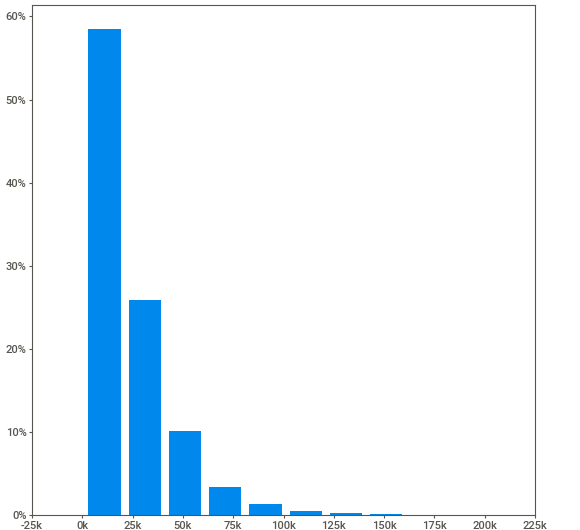
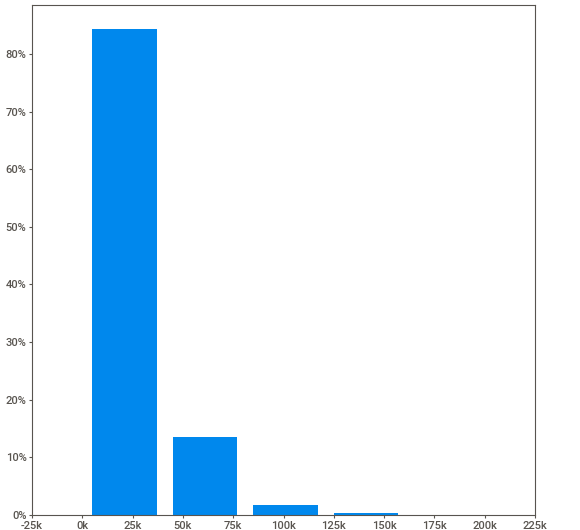
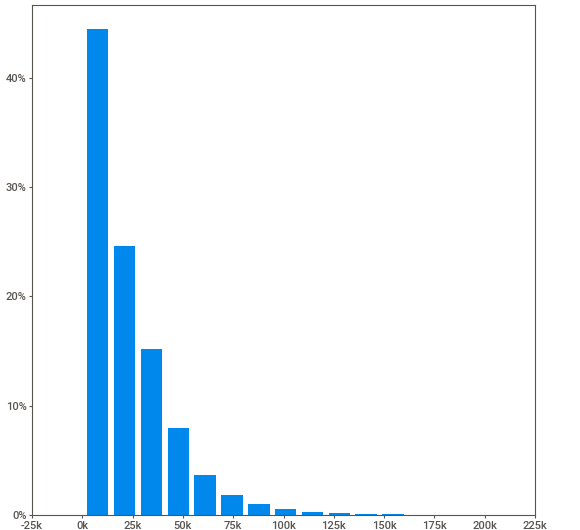
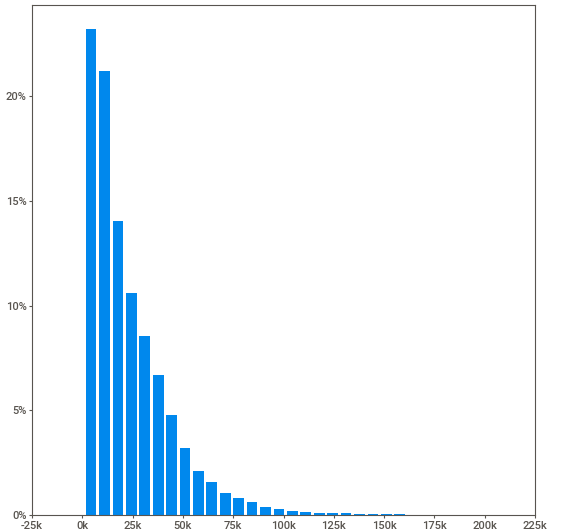
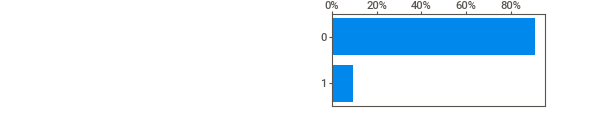
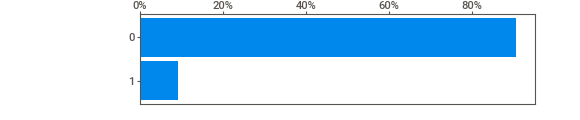
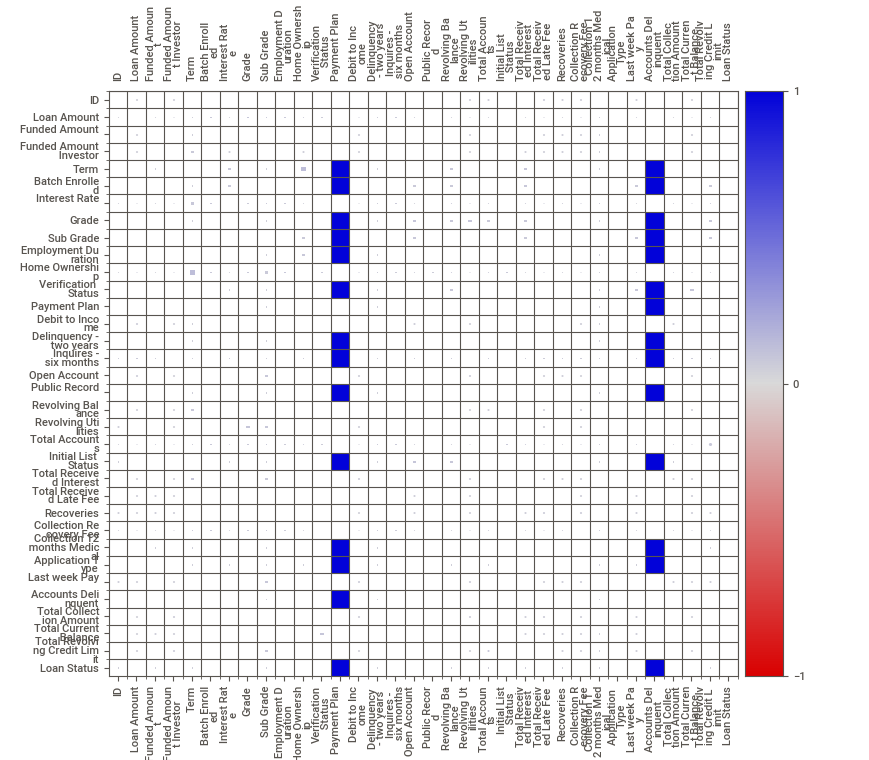
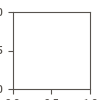

In [ ]:
IPython.display.HTML('analyze.html')

#### Graphics exploration

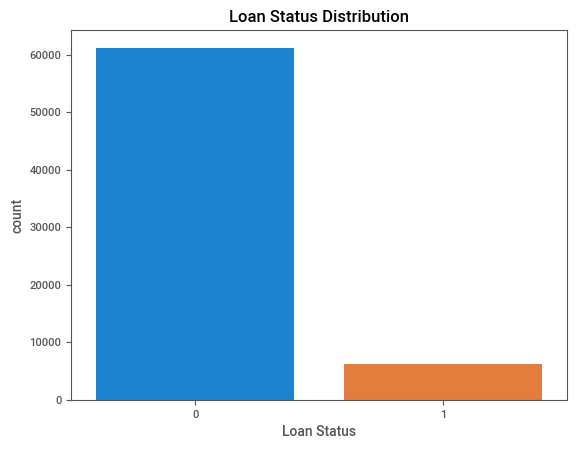

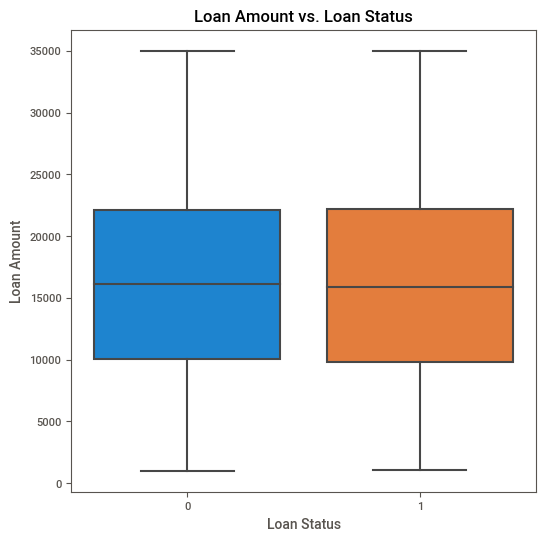

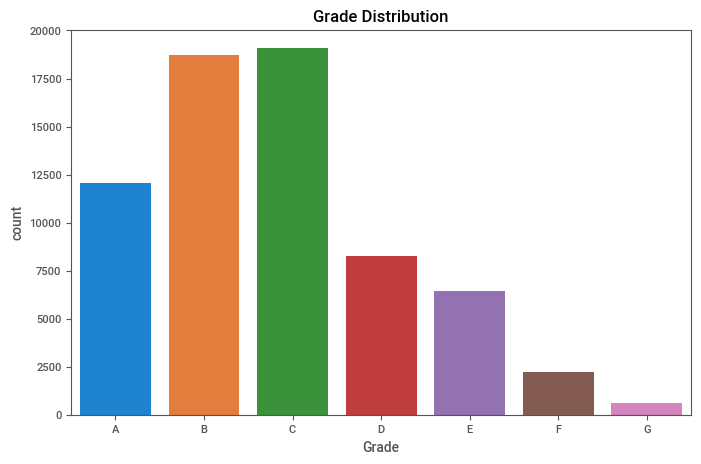

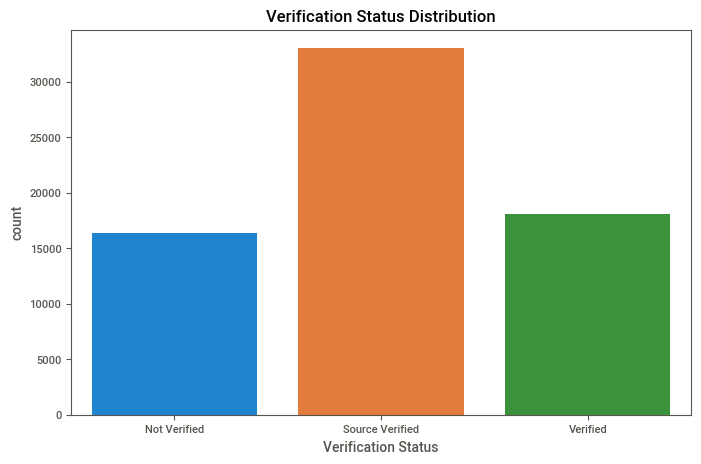

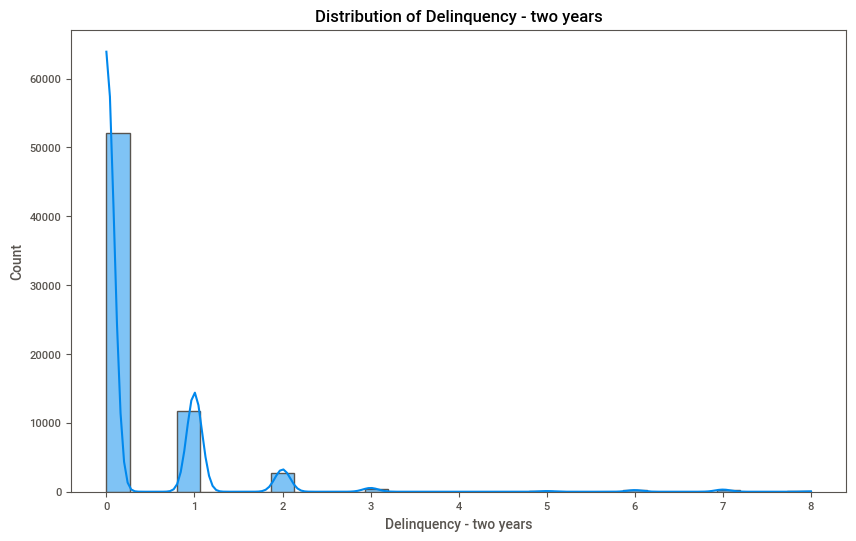

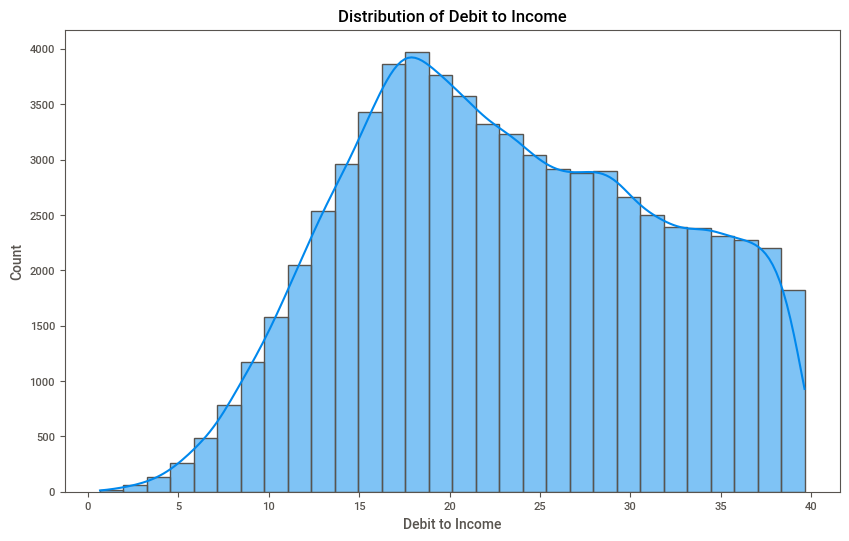

In [135]:
# Visualize the distribution of Loan Status
sns.countplot(x='Loan Status', data=df)
plt.title('Loan Status Distribution')
plt.show()

# Box plots to identify outliers
plt.figure(figsize=(6, 6))
sns.boxplot(x='Loan Status', y='Loan Amount', data=df)
plt.title('Loan Amount vs. Loan Status')
plt.show()

# Countplot for Grade
plt.figure(figsize=(8, 5))
sns.countplot(x='Grade', data=df, order=sorted(df['Grade'].unique()))
plt.title('Grade Distribution')
plt.show()

# Countplot for Verification Status
plt.figure(figsize=(8, 5))
sns.countplot(x='Verification Status', data=df)
plt.title('Verification Status Distribution')
plt.show()

# Histogram for Delinquency - two years
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Delinquency - two years', bins=30, kde=True)
plt.title('Distribution of Delinquency - two years')
plt.xlabel('Delinquency - two years')
plt.show()

# Histogram for Debit to Income
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Debit to Income', bins=30, kde=True)
plt.title('Distribution of Debit to Income')
plt.xlabel('Debit to Income')
plt.show()

#Data pre processing


##### Anova

In [136]:
from scipy.stats import f_oneway, chi2_contingency

# Separate the DataFrame into numerical and categorical attributes
numerical_attributes = df.select_dtypes(include=['int64', 'float64'])
categorical_attributes = df.select_dtypes(include=['object'])

# Create empty lists to store selected features for ANOVA
selected_features_anova = []

# Perform ANOVA for numerical attributes
for column in numerical_attributes.columns:
    p_value = f_oneway(df[df['Loan Status'] == 1][column], df[df['Loan Status'] == 0][column]).pvalue
    if p_value < 0.05:  # You can adjust the significance level (alpha) as needed
        selected_features_anova.append(column)

# Print the selected features for ANOVA
print("Selected features based on ANOVA:")
print(selected_features_anova)

# ANOVA results
anova_results = {}
for column in selected_features_anova:
    anova_result = f_oneway(df[df['Loan Status'] == 1][column], df[df['Loan Status'] == 0][column])
    anova_results[column] = anova_result.pvalue

# Print ANOVA results
print("ANOVA p-values for numerical attributes:")
print(anova_results)


Selected features based on ANOVA:
['Delinquency - two years', 'Public Record', 'Total Received Late Fee', 'Total Collection Amount', 'Total Current Balance', 'Loan Status']
ANOVA p-values for numerical attributes:
{'Delinquency - two years': 0.009462634922992178, 'Public Record': 0.005946386493849328, 'Total Received Late Fee': 0.014999219404735661, 'Total Collection Amount': 0.04037045067395023, 'Total Current Balance': 0.010689900265710124, 'Loan Status': 0.0}


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


##### chi-square

In [137]:
# Separate the DataFrame into numerical and categorical attributes
numerical_attributes = df.select_dtypes(include=['int64', 'float64'])
categorical_attributes = df.select_dtypes(include=['object'])

# Create empty lists to store selected features for ANOVA and Chi-Square
selected_features_chi2 = []

# Perform Chi-Square test for categorical attributes
for column in categorical_attributes.columns:
    contingency_table = pd.crosstab(df[column], df['Loan Status'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    if p_value < 0.05:
        selected_features_chi2.append(column)

# 2. Chi-Square for categorical attributes
chi2_results = {}
for column in selected_features_chi2:
    contingency_table = pd.crosstab(df[column], df['Loan Status'])
    chi2_result = chi2_contingency(contingency_table)
    chi2_results[column] = chi2_result[1]

# Print Chi-Square results
print("\nChi-Square p-values for categorical attributes:")
print(chi2_results)



print("\nSelected features based on Chi-Square:")
print(selected_features_chi2)


Chi-Square p-values for categorical attributes:
{'Grade': 0.0293605144624493, 'Employment Duration': 0.000318849414713897, 'Initial List Status': 0.0005038281525924869}

Selected features based on Chi-Square:
['Grade', 'Employment Duration', 'Initial List Status']


#####  Autocorrelation and multicollinearity

In [138]:
variables_anova = df[selected_features_anova]
variables_chi2 = df[selected_features_chi2]

# Concat two lists
selected_variables = pd.concat([variables_anova, variables_chi2], axis=1)

# Calculate the correlation matrix
correlation_matrix = selected_variables.corr()

# Correlation matrix
print("Matriz de Correlação:")
print(correlation_matrix)


Matriz de Correlação:
                         Delinquency - two years  Public Record  \
Delinquency - two years                 1.000000       0.006716   
Public Record                           0.006716       1.000000   
Total Received Late Fee                 0.007943       0.016594   
Total Collection Amount                 0.005642       0.012928   
Total Current Balance                   0.002602       0.003935   
Loan Status                             0.009990       0.010590   

                         Total Received Late Fee  Total Collection Amount  \
Delinquency - two years                 0.007943                 0.005642   
Public Record                           0.016594                 0.012928   
Total Received Late Fee                 1.000000                 0.007441   
Total Collection Amount                 0.007441                 1.000000   
Total Current Balance                  -0.000526                 0.005318   
Loan Status                             0.0093

<ipython-input-138-1f24d5312a59>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = selected_variables.corr()


In [139]:
# matriz de correlação
correlation_matrix = selected_variables.corr()

# valores próprios
eigenvalues = np.linalg.eigvals(correlation_matrix)

# Examinar os valores próprios
print("Eigenvalues:")
print(eigenvalues)


Eigenvalues:
[1.04092074 0.98183245 0.98600066 0.99150041 0.99658361 1.00316213]


<ipython-input-139-4391f1f40d3d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = selected_variables.corr()


These results suggest that there is no significant multicollinearity between the variables selected by the ANOVA and Chi-square and eigenvalues test. Therefore, there is no impediment to proceed with the construction of predictive models using these variables.

##### Undersampling

In [140]:
from sklearn.utils import resample

features_anova = ['Delinquency - two years', 'Public Record', 'Total Received Late Fee', 'Total Collection Amount', 'Total Current Balance', 'Loan Status']
features_chi2 = ['Grade', 'Employment Duration', 'Initial List Status']

# Criar DataFrame com as variáveis selecionadas
selected_features = df[features_anova + features_chi2]

# Separar as instâncias por classe
df_class_0 = selected_features[selected_features['Loan Status'] == 0]
df_class_1 = selected_features[selected_features['Loan Status'] == 1]

# Undersampling da classe majoritária
df_class_0_undersampled = resample(df_class_0, replace=False, n_samples=len(df_class_1), random_state=42)

# Concatenar os dataframes balanceados
df_balanced = pd.concat([df_class_0_undersampled, df_class_1])

# Embaralhar as instâncias para garantir aleatoriedade
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)




#####  Oversampling

In [141]:
from sklearn.utils import resample
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

features_anova = ['Delinquency - two years', 'Public Record', 'Total Received Late Fee', 'Total Collection Amount', 'Total Current Balance', 'Loan Status']
features_chi2 = ['Grade', 'Employment Duration', 'Initial List Status']

# Criar DataFrame com as variáveis selecionadas
selected_features = df[features_anova + features_chi2]

# Separar as instâncias por classe
df_class_0 = selected_features[selected_features['Loan Status'] == 0]
df_class_1 = selected_features[selected_features['Loan Status'] == 1]

# Verificar se há dados suficientes para realizar o oversampling
if len(df_class_1) < 2:
    raise ValueError("Não há dados suficientes para realizar oversampling. Certifique-se de ter mais de uma instância na classe minoritária.")

# Oversampling da classe minoritária
ros = RandomOverSampler(random_state=42)
X_oversampled, y_oversampled = ros.fit_resample(selected_features.drop('Loan Status', axis=1), selected_features['Loan Status'])

# Criar DataFrame com dados oversampled
df_oversampled = pd.DataFrame(X_oversampled, columns=selected_features.drop('Loan Status', axis=1).columns)
df_oversampled['Loan Status'] = y_oversampled

# Concatenar os dataframes balanceados
df_balanced = pd.concat([df_class_0, df_oversampled])

# Embaralhar as instâncias para garantir aleatoriedade
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)


In [142]:
# Contar a quantidade de instâncias para cada classe
count_loan_status = df_balanced['Loan Status'].value_counts()

# Calcular a porcentagem
percentage_loan_status = count_loan_status / len(df_balanced) * 100

# Exibir os resultados
print("Total de instâncias com Loan Status 0:", count_loan_status[0])
print("Total de instâncias com Loan Status 1:", count_loan_status[1])

print("\nPorcentagem de Loan Status 0: {:.2f}%".format(percentage_loan_status[0]))
print("Porcentagem de Loan Status 1: {:.2f}%".format(percentage_loan_status[1]))


Total de instâncias com Loan Status 0: 122444
Total de instâncias com Loan Status 1: 61222

Porcentagem de Loan Status 0: 66.67%
Porcentagem de Loan Status 1: 33.33%


In [143]:
# Contar a quantidade de instâncias para cada classe nos dados de treino
count_train_loan_status = y_train.value_counts()

# Calcular a porcentagem nos dados de treino
percentage_train_loan_status = count_train_loan_status / len(y_train) * 100

# Exibir os resultados nos dados de treino
print("Dados de Treino:")
print("Total de instâncias com Loan Status 0:", count_train_loan_status[0])
print("Total de instâncias com Loan Status 1:", count_train_loan_status[1])
print("Porcentagem de Loan Status 0 nos dados de treino: {:.2f}%".format(percentage_train_loan_status[0]))
print("Porcentagem de Loan Status 1 nos dados de treino: {:.2f}%\n".format(percentage_train_loan_status[1]))

# Contar a quantidade de instâncias para cada classe nos dados de teste
count_test_loan_status = y_test.value_counts()

# Calcular a porcentagem nos dados de teste
percentage_test_loan_status = count_test_loan_status / len(y_test) * 100

# Exibir os resultados nos dados de teste
print("Dados de Teste:")
print("Total de instâncias com Loan Status 0:", count_test_loan_status[0])
print("Total de instâncias com Loan Status 1:", count_test_loan_status[1])
print("Porcentagem de Loan Status 0 nos dados de teste: {:.2f}%".format(percentage_test_loan_status[0]))
print("Porcentagem de Loan Status 1 nos dados de teste: {:.2f}%".format(percentage_test_loan_status[1]))


Dados de Treino:
Total de instâncias com Loan Status 0: 97869
Total de instâncias com Loan Status 1: 49063
Porcentagem de Loan Status 0 nos dados de treino: 66.61%
Porcentagem de Loan Status 1 nos dados de treino: 33.39%

Dados de Teste:
Total de instâncias com Loan Status 0: 24575
Total de instâncias com Loan Status 1: 12159
Porcentagem de Loan Status 0 nos dados de teste: 66.90%
Porcentagem de Loan Status 1 nos dados de teste: 33.10%


##### Encode variables

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Separar variáveis preditoras (X) e variável alvo (y)
X = df_balanced.drop('Loan Status', axis=1)
y = df_balanced['Loan Status']

# Dividir dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pré-processamento: normalizar numéricas e codificar categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', OneHotEncoder(), X.select_dtypes(include=['object']).columns)
    ])


# Aplicar o pré-processamento aos dados de treino
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Aplicar o pré-processamento aos dados de teste
X_test_preprocessed = preprocessor.transform(X_test)


In [145]:
# Obter os nomes das colunas após o pré-processamento
preprocessed_columns = (
    list(X.select_dtypes(include=['int64', 'float64']).columns) +
    list(preprocessor.named_transformers_['cat'].get_feature_names_out(X.select_dtypes(include=['object']).columns))
)

# Criar DataFrames a partir das matrizes transformadas
X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=preprocessed_columns)
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns=preprocessed_columns)

# Exibir os primeiros registros dos DataFrames transformados
print("Dados de Treino após o pré-processamento:")
print(X_train_preprocessed_df.head())

print("\nDados de Teste após o pré-processamento:")
print(X_test_preprocessed_df.head())


Dados de Treino após o pré-processamento:
   Delinquency - two years  Public Record  Total Received Late Fee  \
0                 0.810142       -0.23678                -0.214786   
1                 0.810142       -0.23678                -0.218594   
2                 0.810142       -0.23678                -0.220152   
3                -0.404410       -0.23678                -0.203413   
4                -0.404410       -0.23678                -0.214227   

   Total Collection Amount  Total Current Balance  Grade_A  Grade_B  Grade_C  \
0                -0.155342               0.709078      0.0      0.0      0.0   
1                 0.529323              -0.192694      0.0      0.0      1.0   
2                -0.147606               0.311133      0.0      1.0      0.0   
3                 2.164269              -0.596483      0.0      1.0      0.0   
4                -0.120529               0.285574      0.0      0.0      1.0   

   Grade_D  Grade_E  Grade_F  Grade_G  Employment Durati

# Models and Evaluation

#### Naive Bayes

In [146]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Criar e treinar o modelo Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_preprocessed, y_train)

# Fazer previsões nos dados de teste
y_pred = nb_model.predict(X_test_preprocessed)

# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibir os resultados
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Exibir um relatório de classificação detalhado
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6399520879838841
Precision: 0.3598634095087996
Recall: 0.1126737396167448
F1 Score: 0.17161468119754478

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.90      0.77     24575
           1       0.36      0.11      0.17     12159

    accuracy                           0.64     36734
   macro avg       0.52      0.51      0.47     36734
weighted avg       0.57      0.64      0.57     36734



#### KNeighbors

In [121]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Criar e treinar o modelo KNeighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_preprocessed, y_train)

# Fazer previsões nos dados de teste
y_pred_knn = knn_model.predict(X_test_preprocessed)

# Avaliar o desempenho do modelo
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Exibir os resultados
print("KNeighbors - Accuracy:", accuracy_knn)
print("KNeighbors - Precision:", precision_knn)
print("KNeighbors - Recall:", recall_knn)
print("KNeighbors - F1 Score:", f1_knn)

# Exibir um relatório de classificação detalhado
print("\nKNeighbors - Classification Report:")
print(classification_report(y_test, y_pred_knn))


KNeighbors - Accuracy: 0.9039581858768443
KNeighbors - Precision: 0.7799909167585805
KNeighbors - Recall: 0.9887326260383256
KNeighbors - F1 Score: 0.8720441027128971

KNeighbors - Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.86      0.92     24575
           1       0.78      0.99      0.87     12159

    accuracy                           0.90     36734
   macro avg       0.89      0.93      0.90     36734
weighted avg       0.92      0.90      0.91     36734



In [122]:
from sklearn.model_selection import cross_validate

# Especificar as métricas desejadas
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']

# Aplicar validação cruzada com 5 folds e obter métricas
cv_results = cross_validate(knn_model, X_train_preprocessed, y_train, cv=5, scoring=scoring_metrics)

# Exibir os resultados da validação cruzada
print("Resultados da Validação Cruzada:")
for metric in scoring_metrics:
    metric_scores = cv_results['test_' + metric]
    print(f"{metric.capitalize()}: {metric_scores}")
    print(f"Média {metric.capitalize()} na Validação Cruzada: {metric_scores.mean():.2f}\n")


Resultados da Validação Cruzada:
Accuracy: [0.8728009  0.87337939 0.87095896 0.87344314 0.87619955]
Média Accuracy na Validação Cruzada: 0.87

Precision: [0.73625263 0.73789441 0.73488336 0.73765504 0.74284141]
Média Precision na Validação Cruzada: 0.74

Recall: [0.96463874 0.96280444 0.95984918 0.9637179  0.96239299]
Média Recall na Validação Cruzada: 0.96

F1: [0.83511248 0.83547774 0.83243482 0.83566789 0.8384834 ]
Média F1 na Validação Cruzada: 0.84



#### Random Forest

In [117]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Criar e treinar o modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_preprocessed, y_train)

# Fazer previsões nos dados de teste
y_pred_rf = rf_model.predict(X_test_preprocessed)

# Avaliar o desempenho do modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Exibir os resultados
print("Random Forest - Accuracy:", accuracy_rf)
print("Random Forest - Precision:", precision_rf)
print("Random Forest - Recall:", recall_rf)
print("Random Forest - F1 Score:", f1_rf)

# Exibir um relatório de classificação detalhado
print("\nRandom Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest - Accuracy: 0.9981760766592258
Random Forest - Precision: 0.9947626841243863
Random Forest - Recall: 0.999753269183321
Random Forest - F1 Score: 0.9972517330489356

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24575
           1       0.99      1.00      1.00     12159

    accuracy                           1.00     36734
   macro avg       1.00      1.00      1.00     36734
weighted avg       1.00      1.00      1.00     36734



In [123]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate


# Especificar as métricas desejadas
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']

# Aplicar validação cruzada com 5 folds e obter métricas
cv_results_rf = cross_validate(rf_model, X_train_preprocessed, y_train, cv=5, scoring=scoring_metrics)

# Exibir os resultados da validação cruzada
print("Resultados da Validação Cruzada - Random Forest:")
for metric in scoring_metrics:
    metric_scores_rf = cv_results_rf['test_' + metric]
    print(f"{metric.capitalize()}: {metric_scores_rf}")
    print(f"Média {metric.capitalize()} na Validação Cruzada: {metric_scores_rf.mean():.2f}\n")


Resultados da Validação Cruzada - Random Forest:
Accuracy: [0.99639296 0.99571239 0.99591642 0.99598448 0.99601851]
Média Accuracy na Validação Cruzada: 1.00

Precision: [0.99020301 0.98850227 0.9899909  0.98959596 0.990092  ]
Média Precision na Validação Cruzada: 0.99

Recall: [0.99908285 0.99877713 0.99785998 0.99847126 0.9980636 ]
Média Recall na Validação Cruzada: 1.00

F1: [0.99462311 0.99361314 0.99390987 0.9940138  0.99406182]
Média F1 na Validação Cruzada: 0.99



#### Logistic Regression

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Criar e treinar o modelo de Regressão Logística
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_preprocessed, y_train)

# Fazer previsões nos dados de teste
y_pred_logreg = logreg_model.predict(X_test_preprocessed)

# Avaliar o desempenho do modelo nos dados de teste
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)

# Exibir os resultados
print("Regressão Logística - Accuracy:", accuracy_logreg)
print("Regressão Logística - Precision:", precision_logreg)
print("Regressão Logística - Recall:", recall_logreg)
print("Regressão Logística - F1 Score:", f1_logreg)

# Exibir um relatório de classificação detalhado
print("\nRegressão Logística - Classification Report:")
print(classification_report(y_test, y_pred_logreg))

# Realizar validação cruzada com 5 folds
cv_scores_logreg = cross_val_score(logreg_model, X_train_preprocessed, y_train, cv=5, scoring='accuracy')

# Exibir os resultados da validação cruzada
print("\nResultados da Validação Cruzada (Accuracy):")
print(cv_scores_logreg)
print("Média da Acurácia na Validação Cruzada: {:.2f}".format(cv_scores_logreg.mean()))


Regressão Logística - Accuracy: 0.6689170795448358
Regressão Logística - Precision: 0.2857142857142857
Regressão Logística - Recall: 0.00016448721111933547
Regressão Logística - F1 Score: 0.0003287851389117212

Regressão Logística - Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80     24575
           1       0.29      0.00      0.00     12159

    accuracy                           0.67     36734
   macro avg       0.48      0.50      0.40     36734
weighted avg       0.54      0.67      0.54     36734


Resultados da Validação Cruzada (Accuracy):
[0.66611087 0.66614489 0.66596338 0.66596338 0.66599741]
Média da Acurácia na Validação Cruzada: 0.67


#### Roc Curve

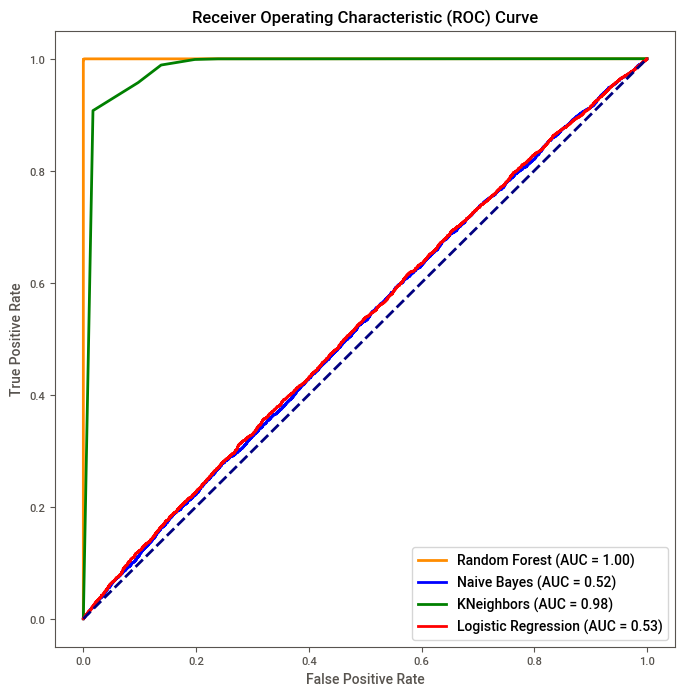

In [119]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Modelos
models = [rf_model, nb_model, knn_model, logreg_model]
model_names = ['Random Forest', 'Naive Bayes', 'KNeighbors', 'Logistic Regression']

# Cores para os gráficos
colors = ['darkorange', 'blue', 'green', 'red']

# Plotar curvas ROC para cada modelo
plt.figure(figsize=(8, 8))
for model, name, color in zip(models, model_names, colors):
    y_proba = model.predict_proba(X_test_preprocessed)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, color=color, lw=2, label='{} (AUC = {:.2f})'.format(name, roc_auc))

# Linha diagonal (aleatório)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Configurações do gráfico
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
